# Cross-sell Health Insurance Project

Feature|Description
--|--------------------------|
id|	Unique ID for the customer
Gender|	Gender of the customer
Age|	Age of the customer
Driving_License|	0 : Customer does not have DL, 1 : Customer already has DL
Region_Code|	Unique code for the region of the customer
Previously_Insured|	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age|	Age of the Vehicle
Vehicle_Damage|	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium|	The amount customer needs to pay as premium in the year
PolicySalesChannel|	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage|	Number of Days, Customer has been associated with the company
Response|	1 : Customer is interested, 0 : Customer is not interested

## Insurance Business Model

An insurance business works like this: the insurance company assumes the risks of individual payers and redistributes it across a larger group of people.
There are, generally, two ways of generating revenues: charging premiums for insurance coverage and then reinvesting those premiums into interest-generating assets.
The premium is based on the risk of each customer. The company has to estimate the probability of a customer claiming the insurance and extend this risk till the end of the contract. The customers with the highest risks pay more, and the ones with the lowest risks pay less.

## Cross Selling Strategy

Cross-selling is a strategy for selling complementary products or related and complementary services, taking into account the customer's interest. In our case, we have a health insurance company that wants to sell vehicle insurance to its customers.

**Benefits**

Acquiring new customers is too expensive. So if we can sell other products to people that are already customers, we will spend less money to achieve the revenue goal.

# 0.0 Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
from IPython.core.display import HTML
from IPython.display import Image
import statsmodels.stats.proportion as sp
import helper_function as hf

from sklearn.model_selection import train_test_split

import scipy.stats as ss
from feature_engine import encoding as enc

In [2]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
display('<style.container {width: 100% !important; }</style')
plt.rcParams['figure.autolayout'] = True

pd.options.display.max_columns = None

'<style.container {width: 100% !important; }</style'

## 1.0 Loading Data

In [3]:
raw_data = pd.read_csv('../data/raw_data.csv')
raw_data.head()

id  gender  age  region_code  policy_sales_channel  previously_insured  \
0   1    Male   44         28.0                  26.0                   0   
1   2    Male   76          3.0                  26.0                   0   
2   3    Male   47         28.0                  26.0                   0   
3   4    Male   21         11.0                 152.0                   1   
4   5  Female   29         41.0                 152.0                   1   

   annual_premium  vintage  response  driving_license vehicle_age  \
0         40454.0      217         1                1   > 2 Years   
1         33536.0      183         0                1    1-2 Year   
2         38294.0       27         1                1   > 2 Years   
3         28619.0      203         0                1    < 1 Year   
4         27496.0       39         0                1    < 1 Year   

  vehicle_damage  
0            Yes  
1             No  
2            Yes  
3             No  
4             No

## 1.1 Spliting the data - train, validation, and test.

In [4]:
data_train, data_test = train_test_split(raw_data, train_size=0.85, stratify=raw_data['response'], random_state=42)

In [5]:
#data_test.to_csv('../data/test_eval.csv', index=False)
#data_train.to_csv('../data/train.csv', index=False)

# 2.0 Descriptive Analysis & Data Cleaning

In [6]:
df1 = data_train.copy()

## 2.1 Data Dimension

In [7]:
print('Number of Columns:', df1.shape[1])
print('Number of Rows:', df1.shape[0])

Number of Columns: 12
Number of Rows: 323942


# 2.2 Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 2.3 Missing Values

In [9]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

### 2.3.1 Checking for inconsistencies

In [10]:
df1['gender'].value_counts()

Male      175149
Female    148793
Name: gender, dtype: int64

In [11]:
df1['response'].value_counts()

0    284239
1     39703
Name: response, dtype: int64

The data is unbalanced

In [12]:
df1['vehicle_age'].value_counts()

1-2 Year     170222
< 1 Year     140094
> 2 Years     13626
Name: vehicle_age, dtype: int64

In [13]:
df1['vehicle_damage'].value_counts()

Yes    163625
No     160317
Name: vehicle_damage, dtype: int64

In [14]:
df1.duplicated().sum()

0

# 2.4. Descriptive Statisitcs

## 2.4.1. Numerical Variables

In [15]:
num_att = df1.select_dtypes(include=['float64', 'int64'])

In [16]:
num_att.agg(['min', 'max', 'ptp', 'mean', 'median', 'var', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'Attributes', 'ptp': 'range'})

Attributes     min       max     range           mean    median  \
0                    id     1.0  381109.0  381108.0  190689.986837  190766.5   
1                   age    20.0      85.0      65.0      38.827691      36.0   
2           region_code     0.0      52.0      52.0      26.396827      28.0   
3  policy_sales_channel     1.0     163.0     162.0     112.059356     133.0   
4    previously_insured     0.0       1.0       1.0       0.457897       0.0   
5        annual_premium  2630.0  540165.0  537535.0   30579.735274   31687.0   
6               vintage    10.0     299.0     289.0     154.396858     154.0   
7              response     0.0       1.0       1.0       0.122562       0.0   
8       driving_license     0.0       1.0       1.0       0.997848       1.0   

            var            std       skew    kurtosis  
0  1.210790e+10  110035.891657  -0.000509   -1.199872  
1  2.407040e+02      15.514640   0.671487   -0.568759  
2  1.750852e+02      13.231976  -0.115599   -0.868099  
3  2.936235e+03      54.187035  -0.901072   -0.968501  
4  2.482281e-01       0.498225   0.169014   -1.971446  
5  2.964092e+08   17216.538291   1.693696   31.463205  
6  6.998009e+03      83.654103   0.001833   -1.200090  
7  1.075409e-01       0.327934   2.301926    3.298883  
8  2.146997e-03       0.046336 -21.488894  459.775412

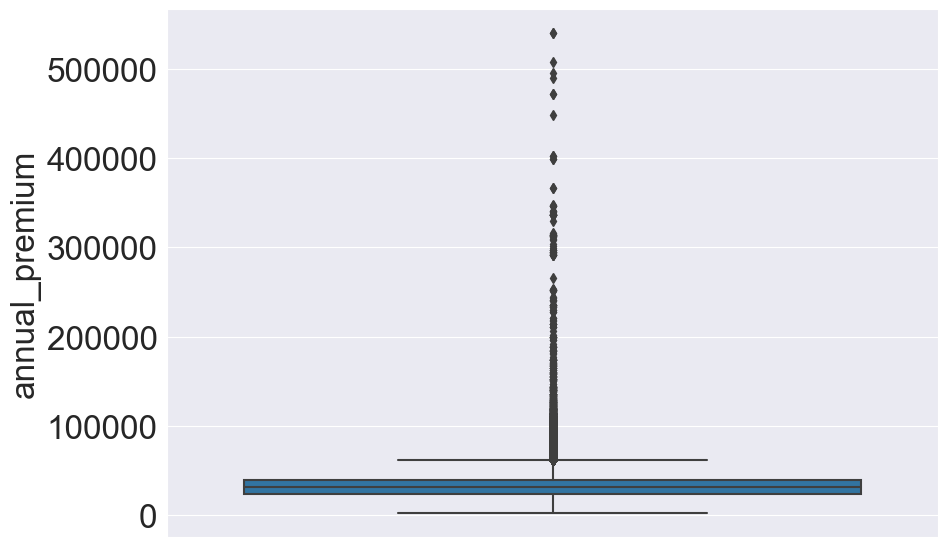

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['annual_premium']);

## 2.4.2. Categorical Attributes

In [19]:
hf.frequency_table(df1, 'gender')

freq      %   %acum
Male    175149.0  54.07   54.07
Female  148793.0  45.93  100.00

In [20]:
hf.frequency_table(df1, 'vehicle_damage')

freq      %   %acum
Yes  163625.0  50.51   50.51
No   160317.0  49.49  100.00

In [21]:
hf.frequency_table(df1, 'vehicle_age')

freq      %   %acum
1-2 Year   170222.0  52.55   52.55
< 1 Year   140094.0  43.25   95.80
> 2 Years   13626.0   4.21  100.01

# 3.0. Feature Engineering

<img src='Health_Insurance_Sales.png'/>

## 3.1 Hypothesis

In [24]:
df2 = df1.copy()

**Customer**

1. Males are more interested in vehicle insurance than females.
2. Older people have higher propensity of acquiring new type of insurance.
3. People that already have vehicle insurance are not interested in the new product.
4. Customers with higher tenure are more interested in acquiring a vehicle insurance.
5. Customers that had a problem with their vehicle in the past are more interested in vehicle insurance.
6. Customers with higher annual premium will be less interested in acquiring another type of insurance.
7. Customers with a new vehicle are more interested in vehicle insurance.

**Products**

1. Customers will be more interested in a vehicle insurance depending on the policy sales channel.
2. If discounts are offered, the customers will be more inclined to acquire vehicle insurance.

## 3.2 New Features

In [25]:
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x== '1-2 Year' else 'under_1_year')

df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)


In [26]:
df2['vehicle_age'].value_counts()

between_1_2_year    170222
under_1_year        140094
over_2_years         13626
Name: vehicle_age, dtype: int64

In [27]:
df2.head()

id  gender  age  region_code  policy_sales_channel  \
265883  265884  Female   27         15.0                 152.0   
246326  246327  Female   45         33.0                 120.0   
179484  179485    Male   66         50.0                   8.0   
74612    74613  Female   25         25.0                 160.0   
217055  217056  Female   59         37.0                  26.0   

        previously_insured  annual_premium  vintage  response  \
265883                   0         26898.0      106         0   
246326                   0         34133.0      238         0   
179484                   0         48486.0      173         0   
74612                    1         30780.0      228         0   
217055                   1         35575.0      238         0   

        driving_license       vehicle_age  vehicle_damage  
265883                1      under_1_year               0  
246326                1  between_1_2_year               1  
179484                1      over_2_years               1  
74612                 1      under_1_year               1  
217055                1  between_1_2_year               0

## `Data Filtering`

Not necessary

# 4.0 Exploratory Analysis

In [30]:
df3 = df2.copy()

In [31]:
#df3['response'] = df3['response'].apply(lambda x: 'Yes' if x == 1 else #'No')
#df3['driving_license'] = df3['driving_license'].apply(lambda x: 'Yes' if x #== 1 else 'No')
#
#df3['previously_insured'] = df3['previously_insured'].apply(lambda x: #'Yes' if x == 1 else 'No')

## 4.1 Univariate Analysis

### 4.1.1 Numerical Variables

<Figure size 3000x1500 with 0 Axes>

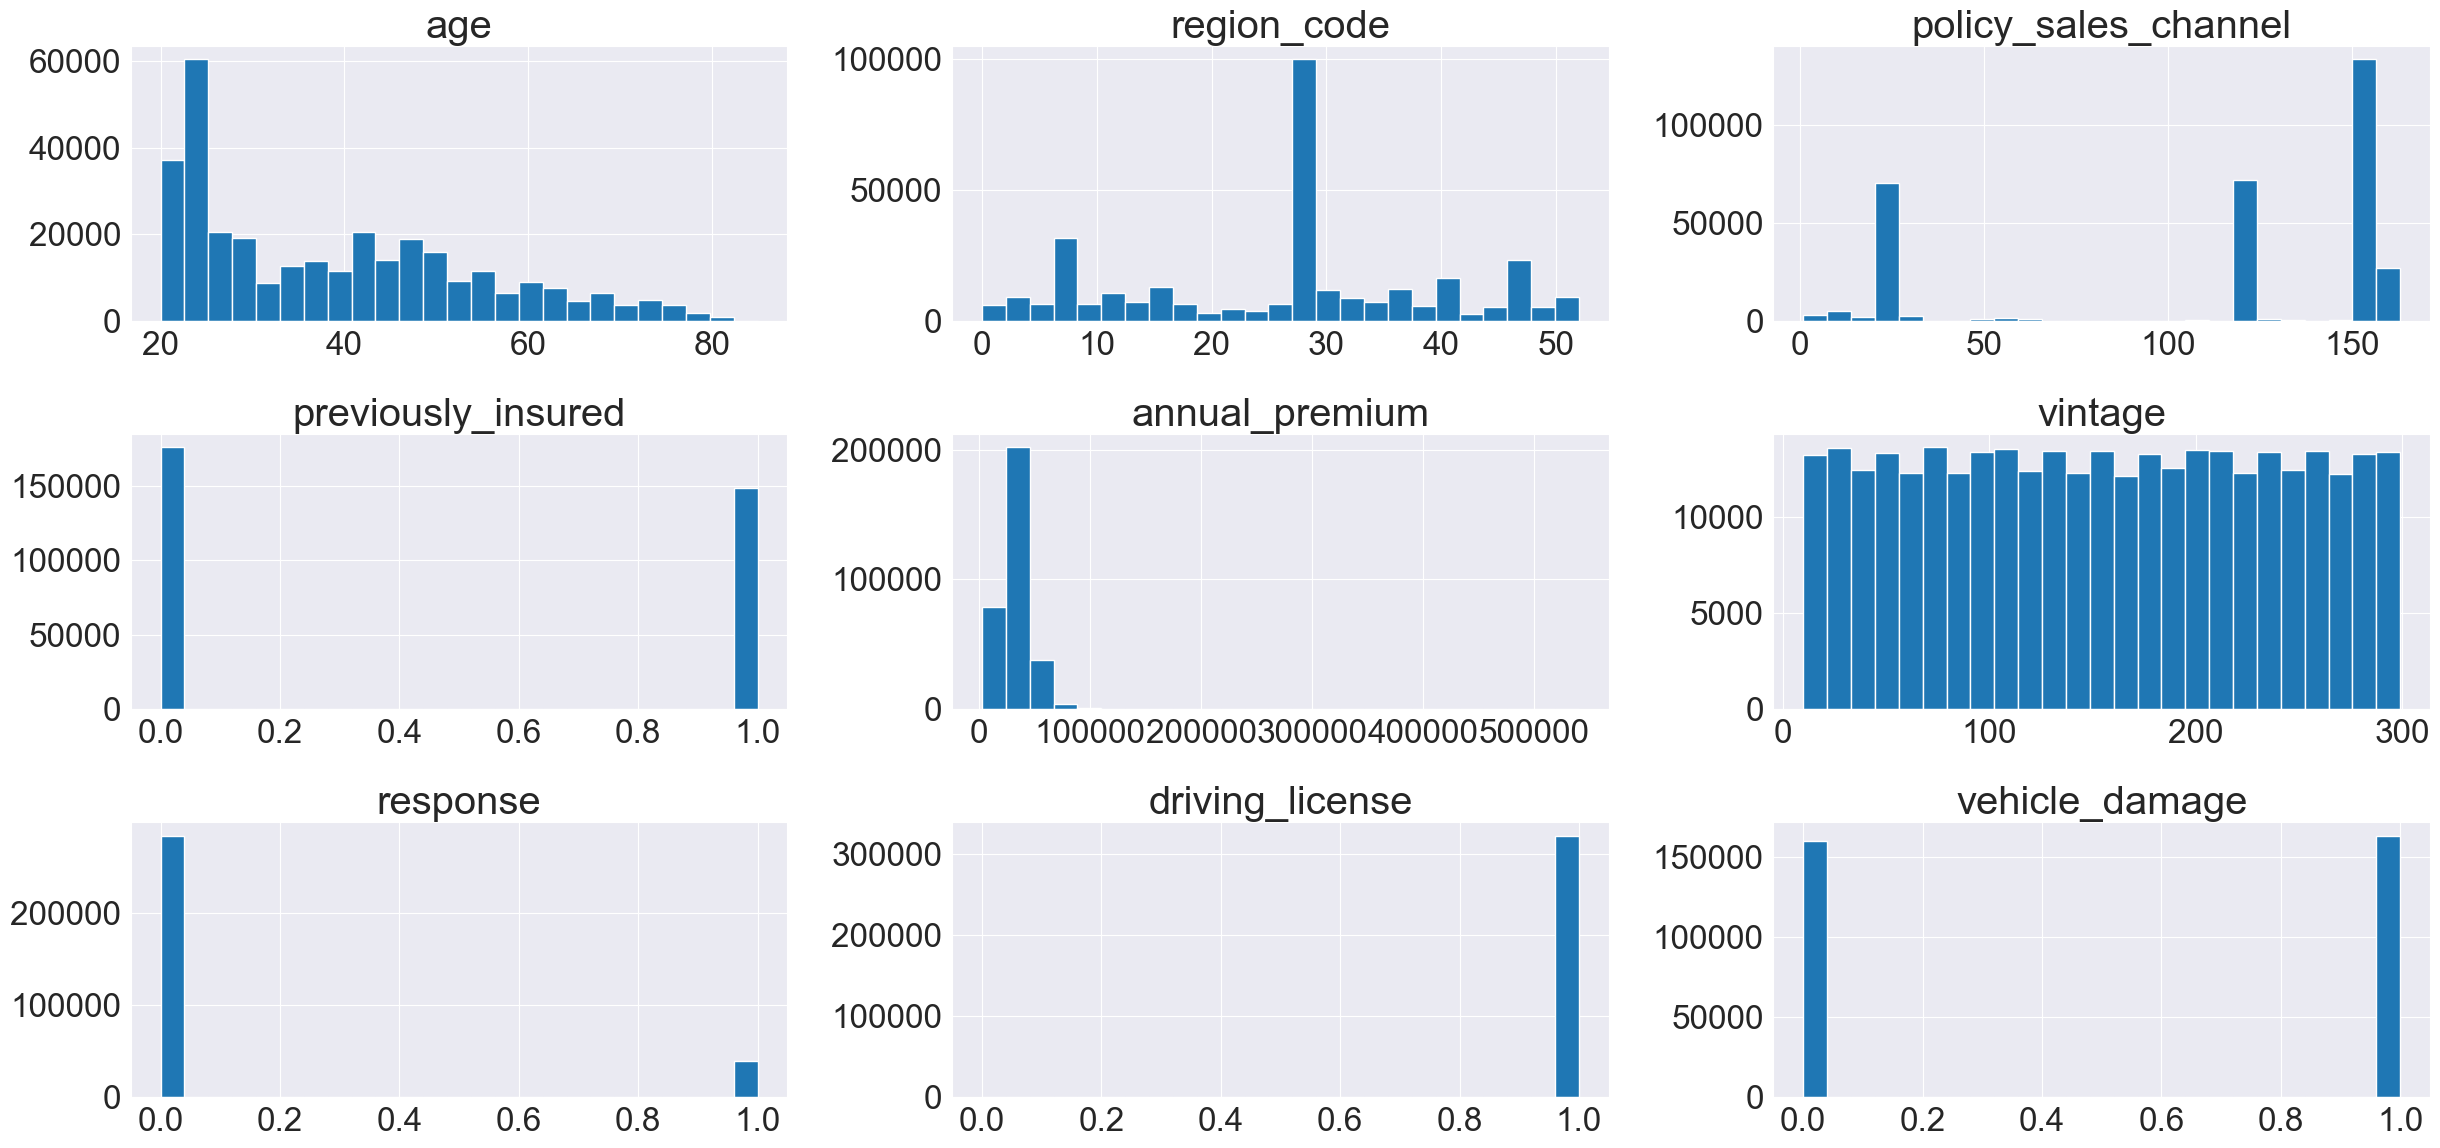

In [32]:
plt.figure(figsize=(30, 15))
df3.select_dtypes(include=['float64', 'int64']).drop('id', axis=1).hist(bins=25);

**Age**

The age variable follows a sort of bimodal distribution where we see a higher concentration of lower values.

**Vintage**

Looks like an uniform distribution.

**Annual Premium** 

As expected, the annual premium has a distribution that is right skewed.



### 4.1.1 Categorical Variables

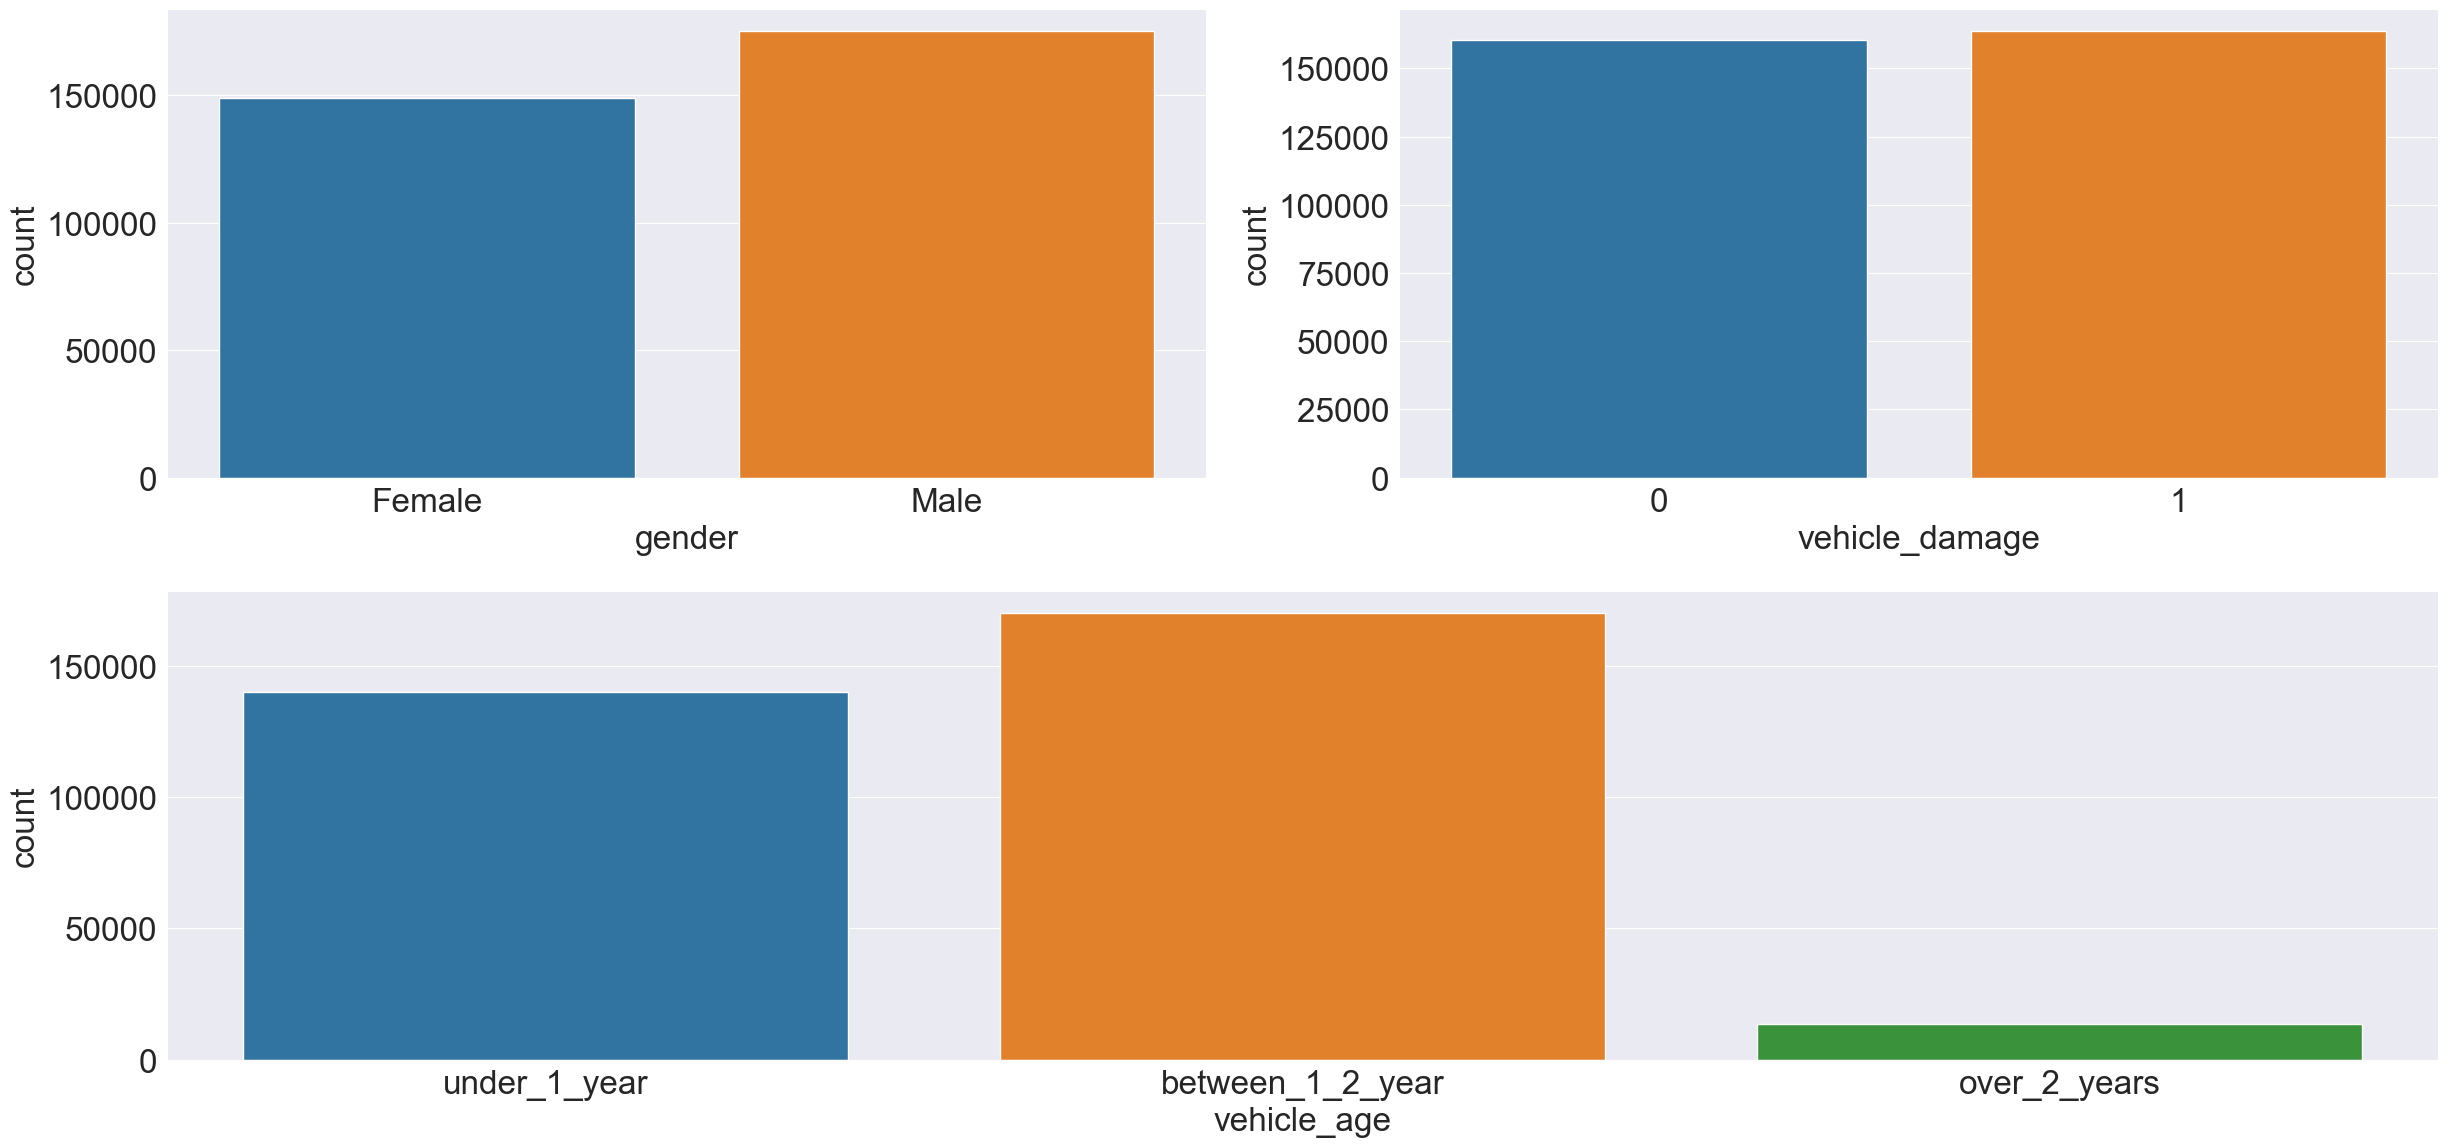

In [33]:
grid = GridSpec(2, 2)

plt.subplot(grid[0, 0])
sns.countplot(x='gender', data=df3)

plt.subplot(grid[0, 1])
sns.countplot(x='vehicle_damage', data=df3)

plt.subplot(grid[1, :])
sns.countplot(x='vehicle_age', data=df3)
plt.tight_layout()

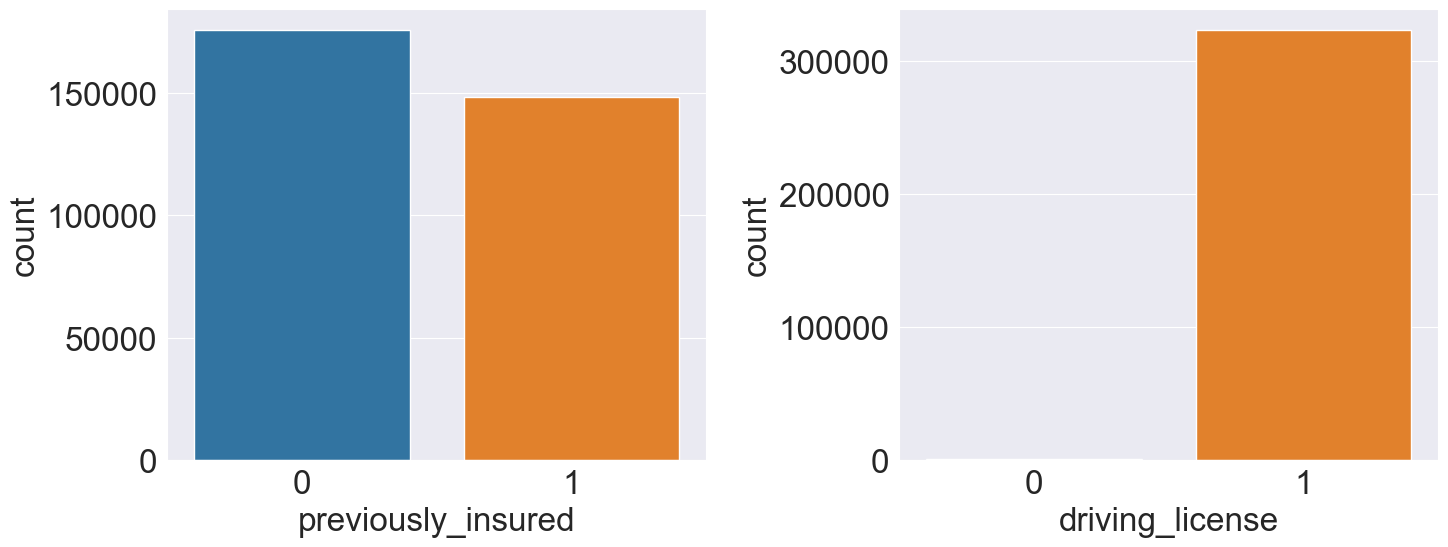

In [34]:
plt.figure(figsize=(15, 6))
grid = GridSpec(1, 2)

plt.subplot(grid[0, 0])
sns.countplot(x='previously_insured', data=df3)

plt.subplot(grid[0, 1])
sns.countplot(x='driving_license', data=df3)
plt.tight_layout()

### 4.1.2 Univariate analysis with respect to the target variable

**Response**

Response percentage:
 0    87.74
1    12.26
Name: response, dtype: float64


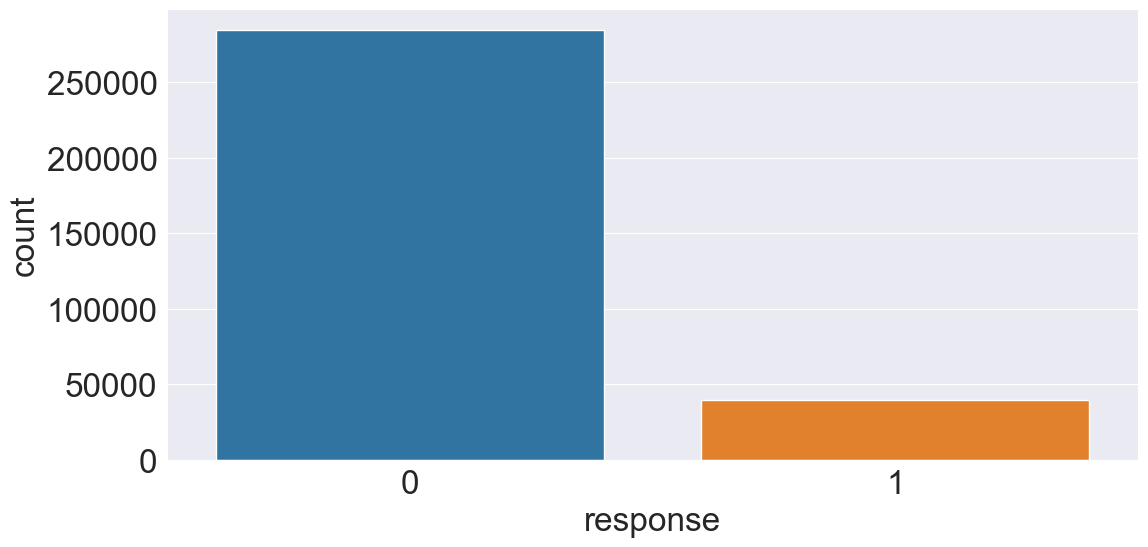

In [35]:
print('Response percentage:\n', round(df3.response.value_counts(normalize=True)*100, 2))
plt.figure(figsize=(12, 6))
sns.countplot(x='response', data=df3);

12.26 % of the customers are interested in acquiring vehicle insurance.

**Age**

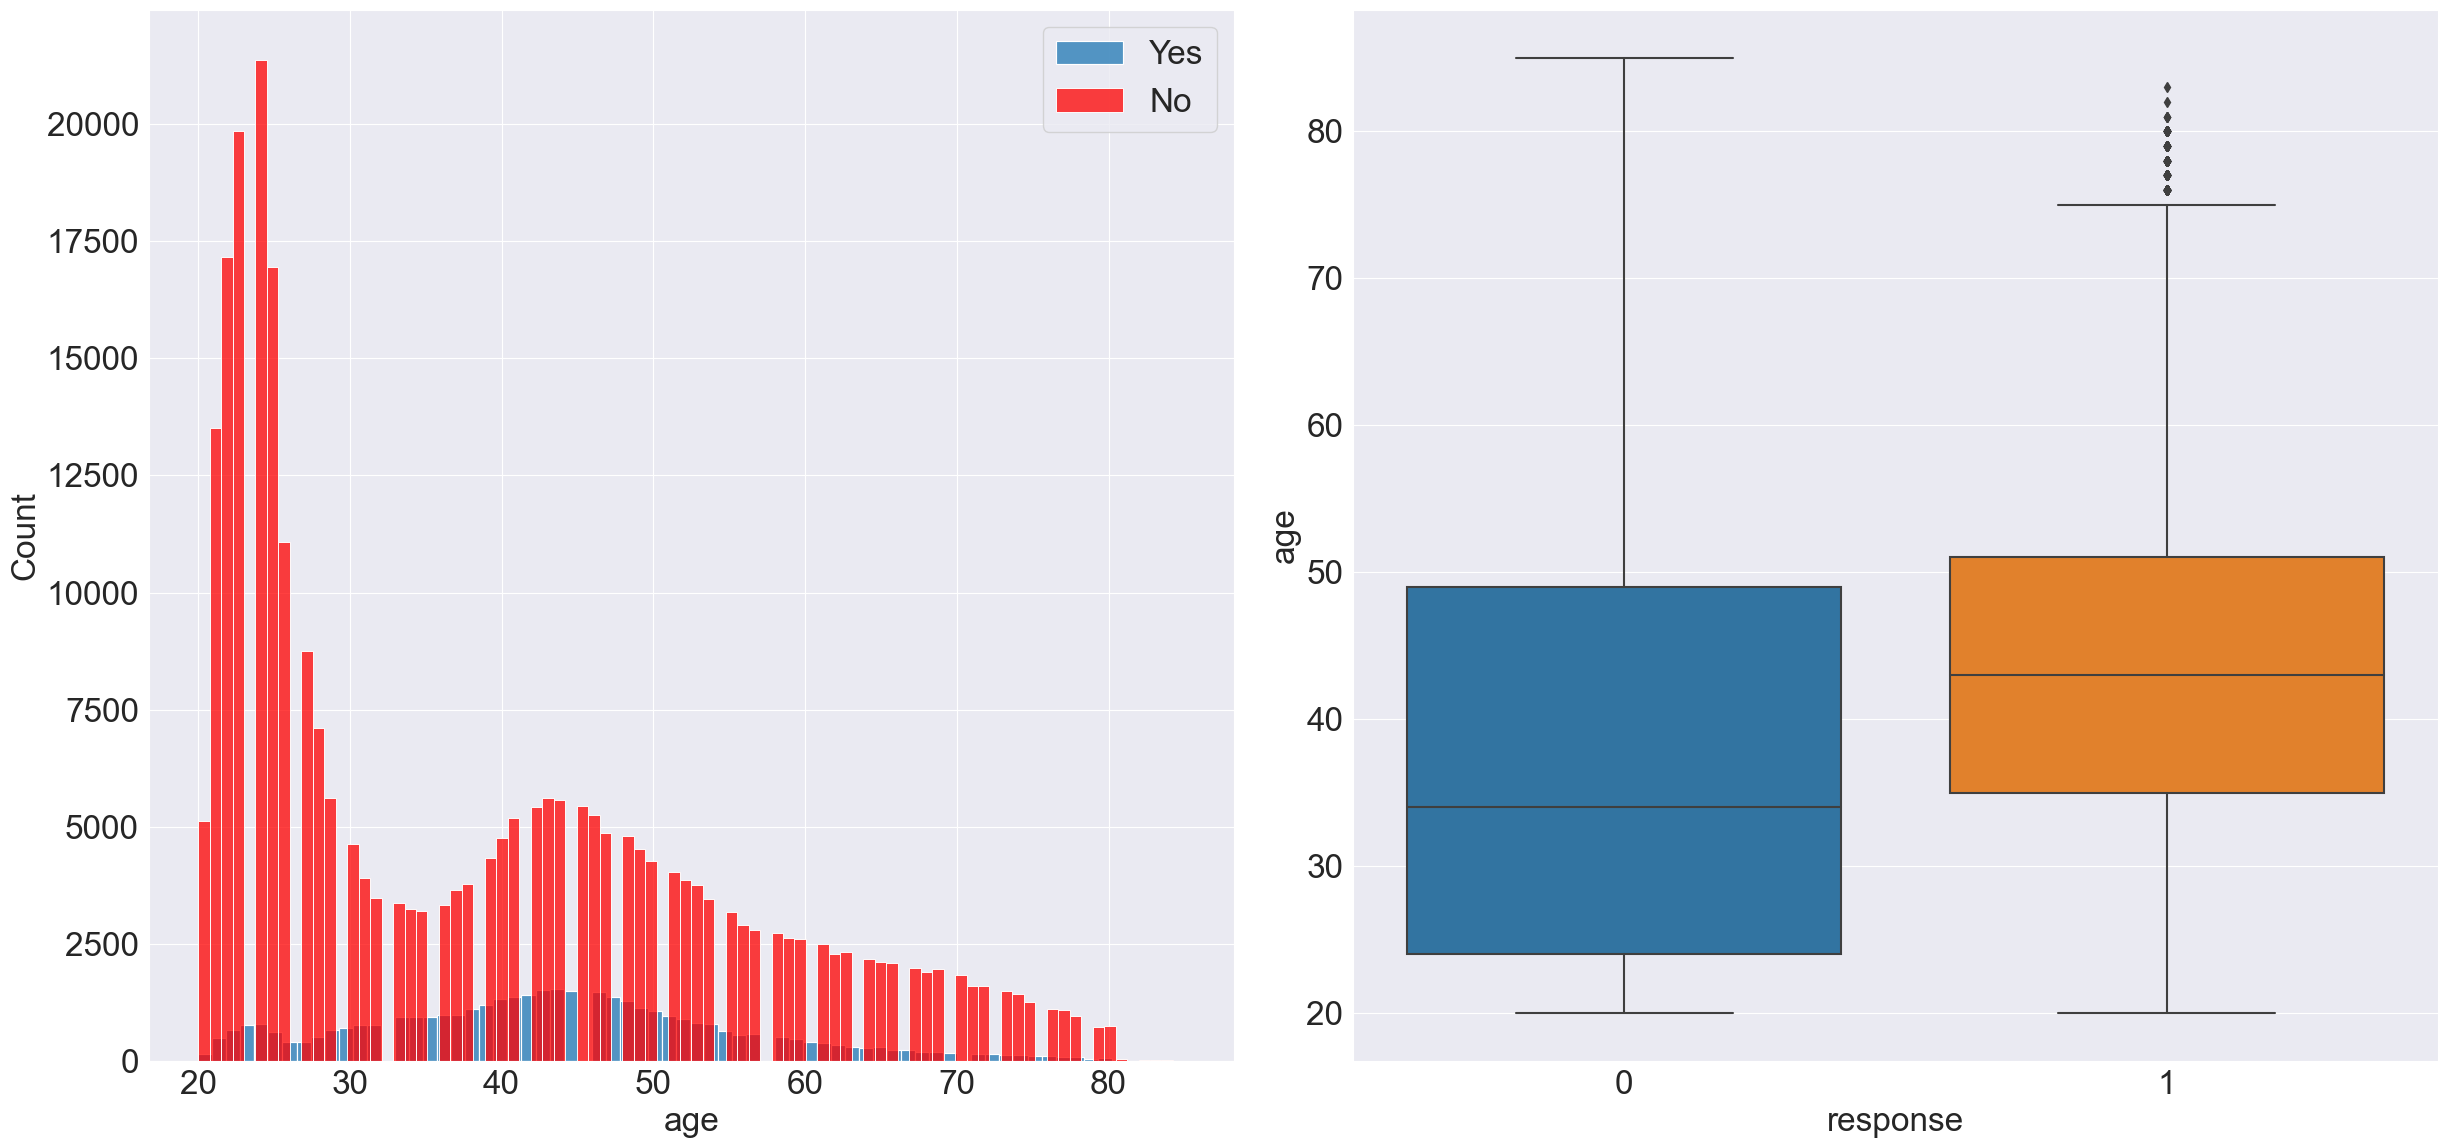

In [36]:
# Age
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df3.query("response == 1"), label='Yes')
sns.histplot(x='age', data=df3.query("response == 0"), label='No', color='red')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='response', y='age', data=df3);

For the age distribution of customers that are interested in vehicle insurance, we have a higher concentration in the age range of 40 to 47 years. While for those who aren't interested in vehicle insurance, the distribution is concentrated in lower ages (20 to 26).

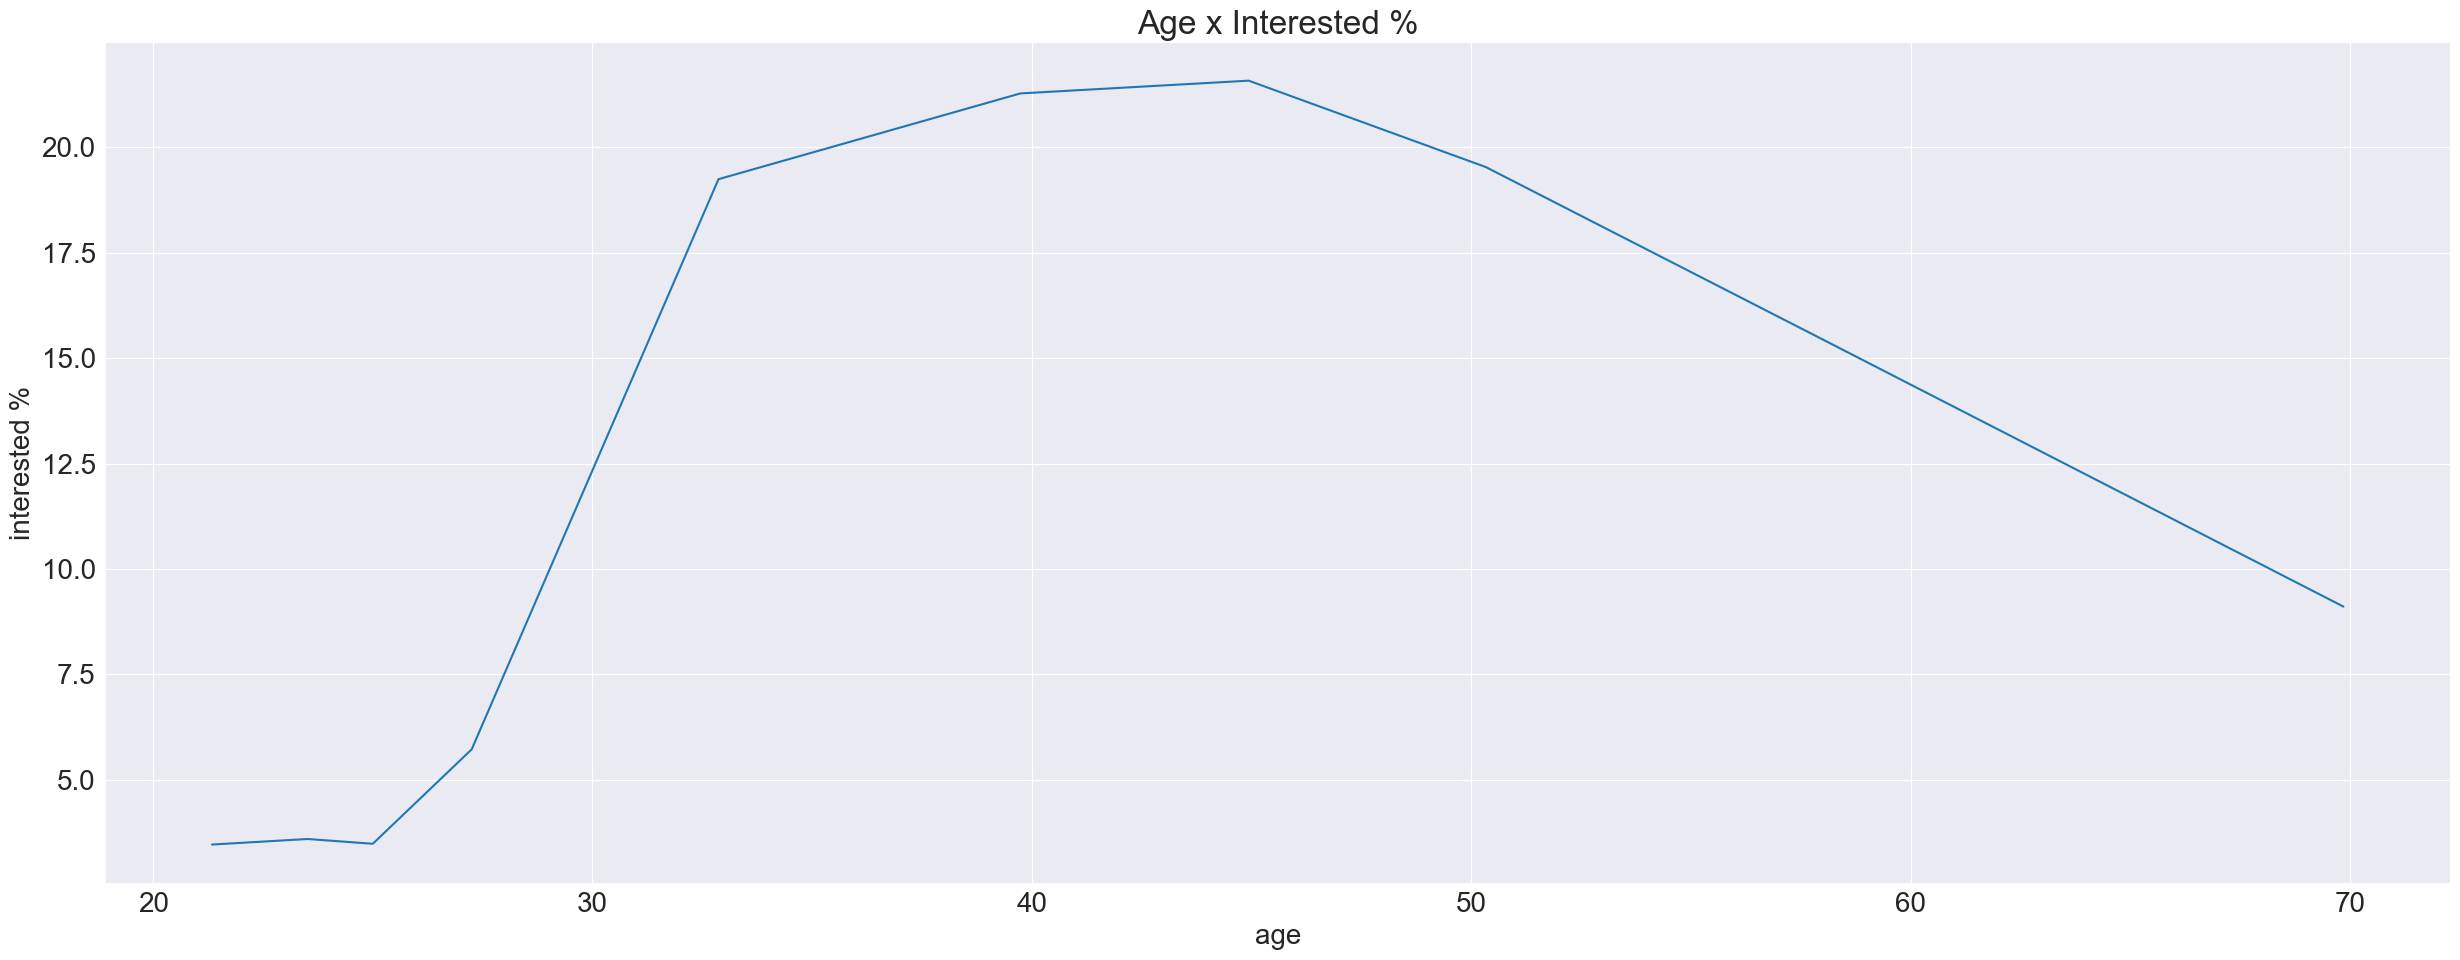

In [83]:
plt.figure(figsize=(25, 10))
hf.cohort_plot(df2, 'age', 'response')

**Annual Premium**

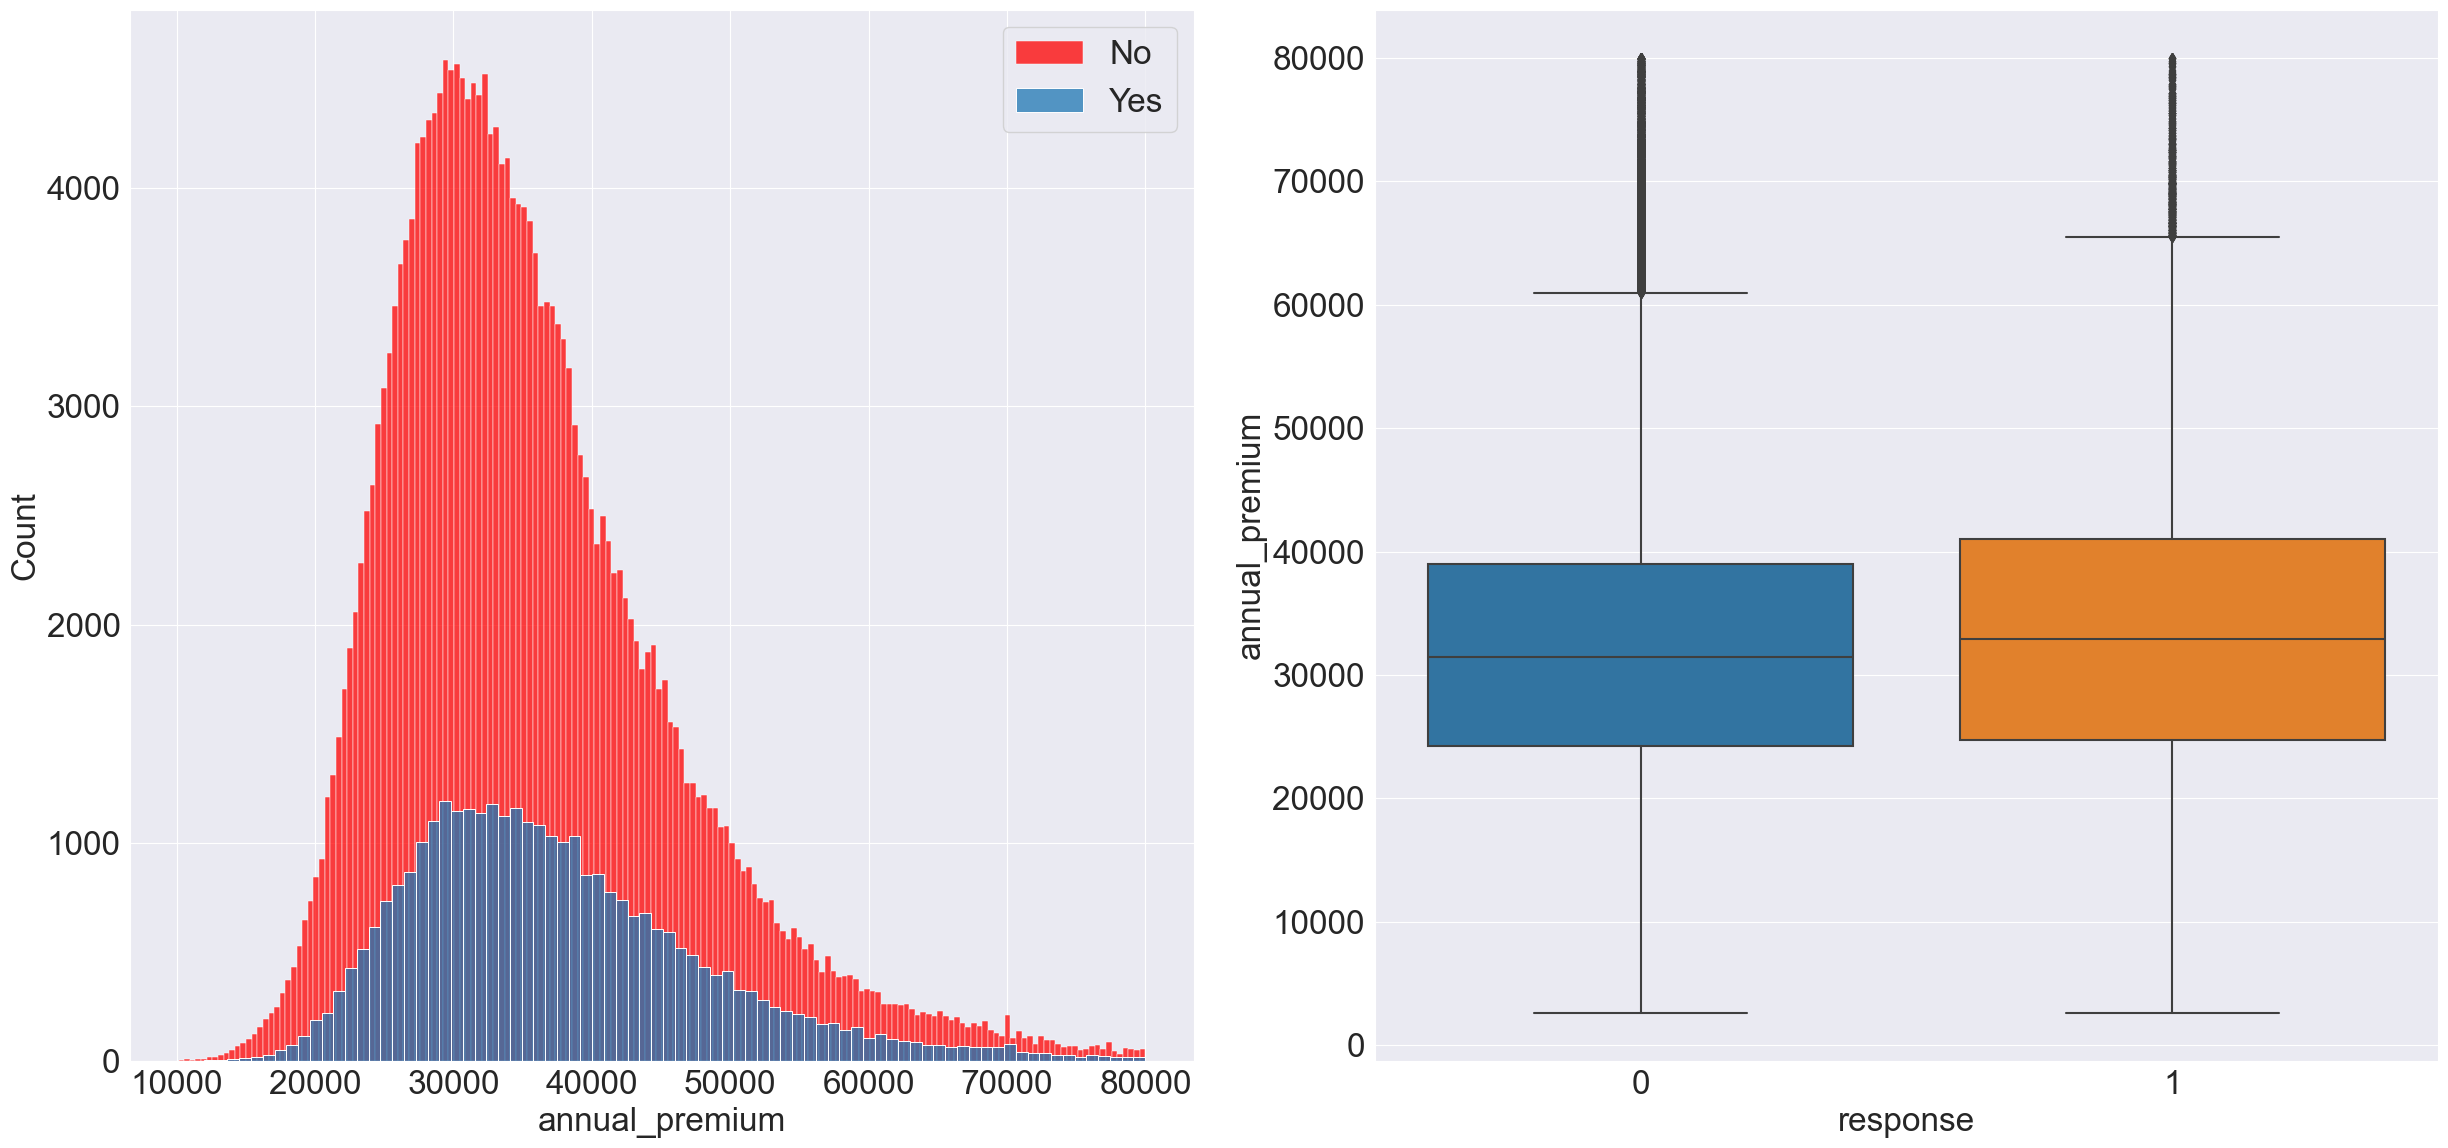

In [37]:
# Annual Premium

# Filtering the data for better visualization
aux = df3.query('annual_premium > 10000 & annual_premium < 80000')

plt.subplot(1, 2, 1)
sns.histplot(x='annual_premium', data=aux.query("response == 0"), label='No', color='red')

aux = df3.query('annual_premium > 10000 & annual_premium < 80000')
sns.histplot(x='annual_premium', data=aux.query("response == 1"), label='Yes')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='response', y='annual_premium', data=df3.query('annual_premium < 80000'));

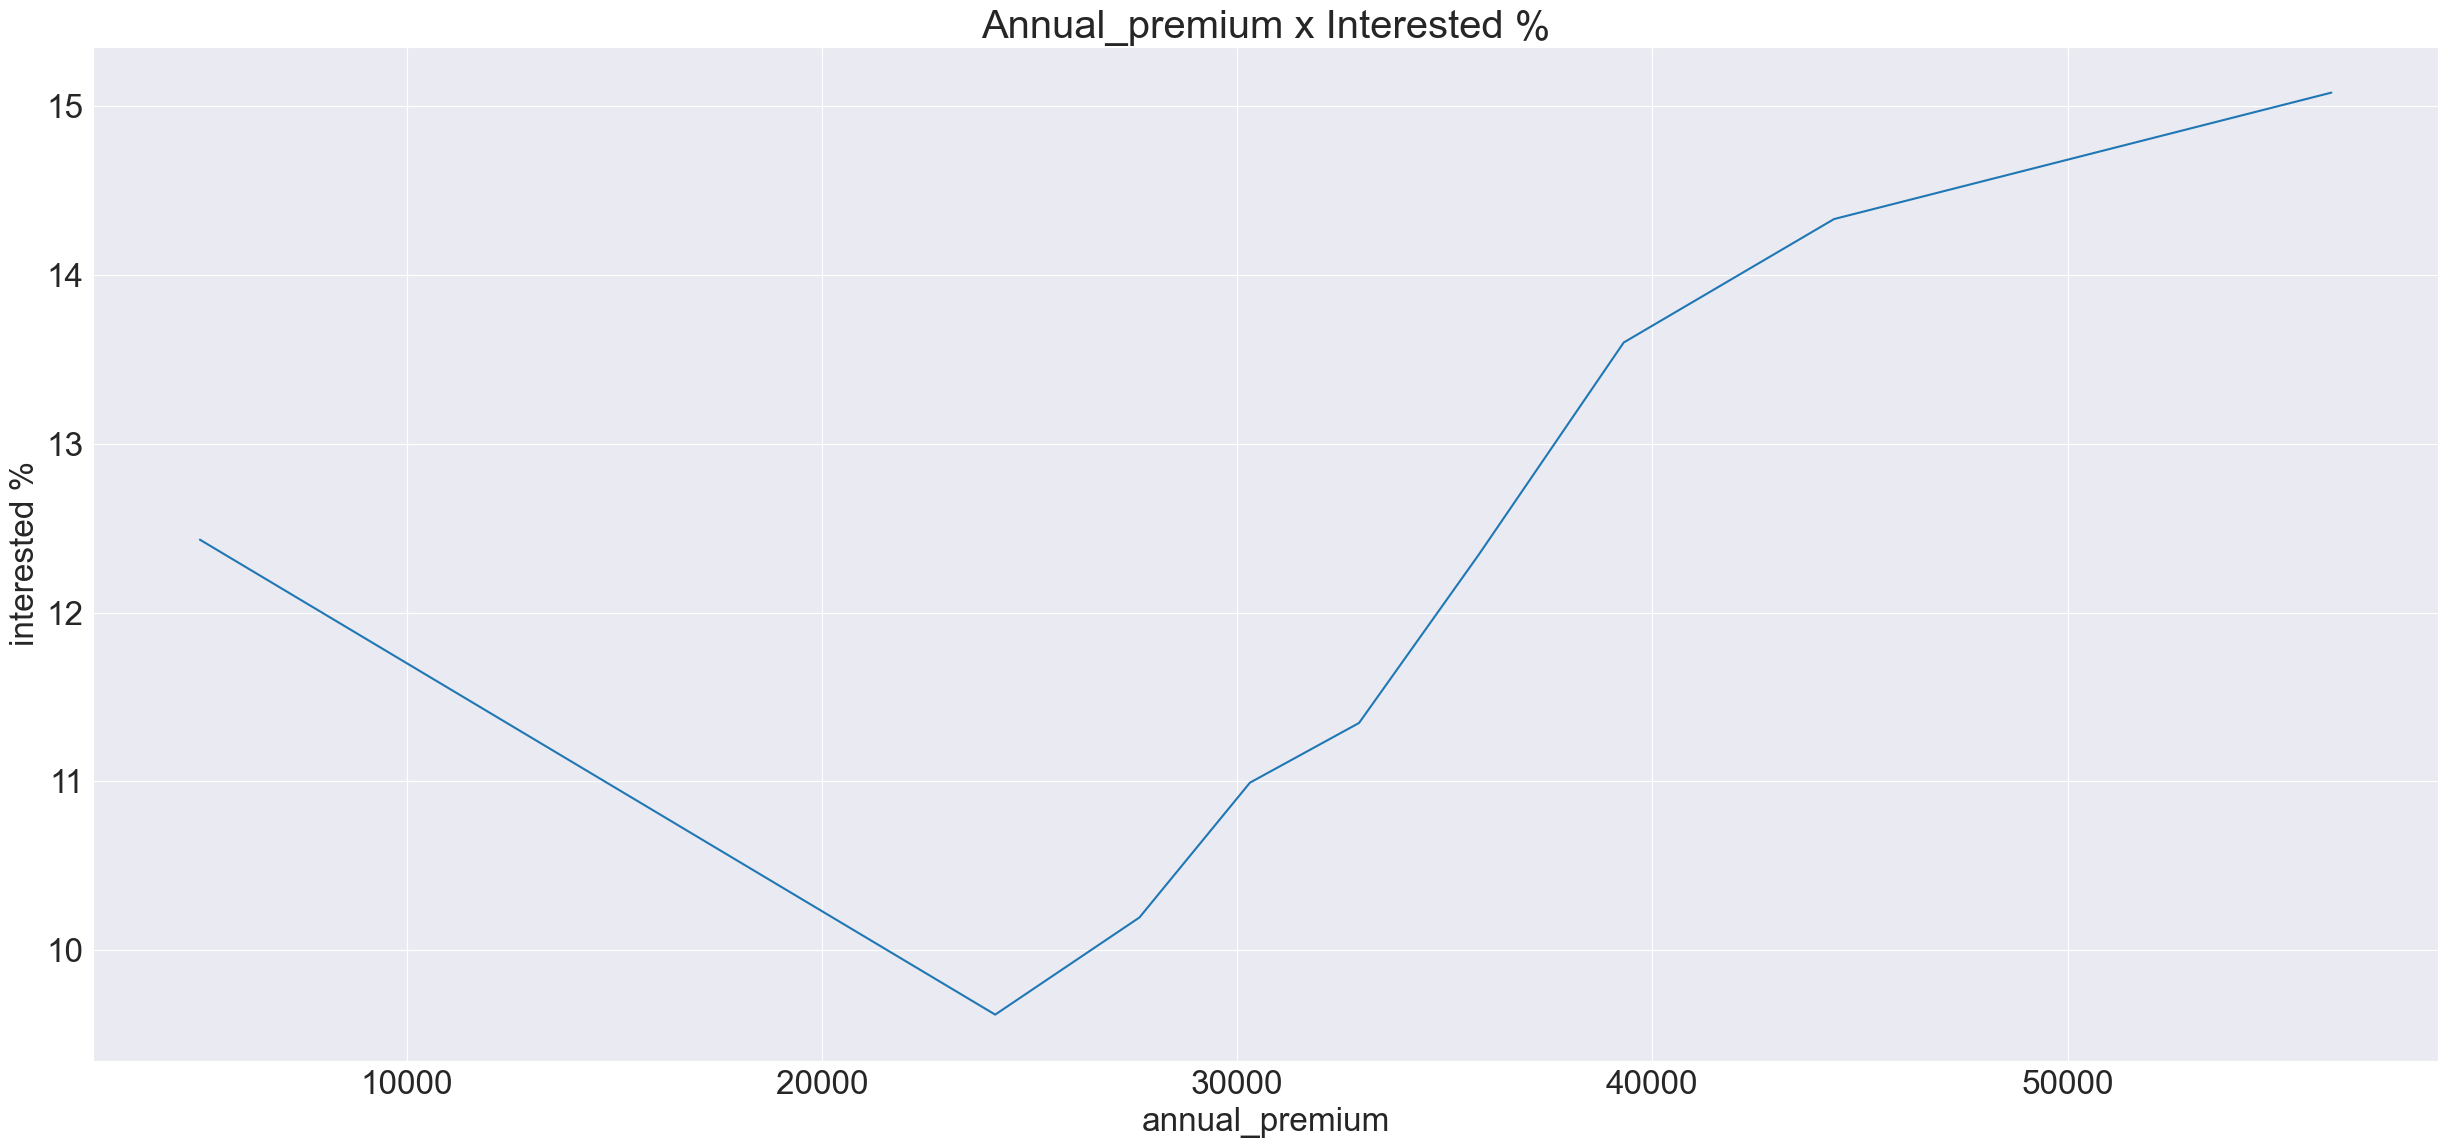

In [38]:
hf.cohort_plot(df3.query('annual_premium < 80000'), 'annual_premium', 'response')

We can see that the distribution of annual premiums has the same shape for both types of customers: those who showed interest in vehicle insurance and those who didn't.

For the groups with 40000+ average premium, the percentage of people interested in car insurance is higher than the general proportion.

**Vintage**

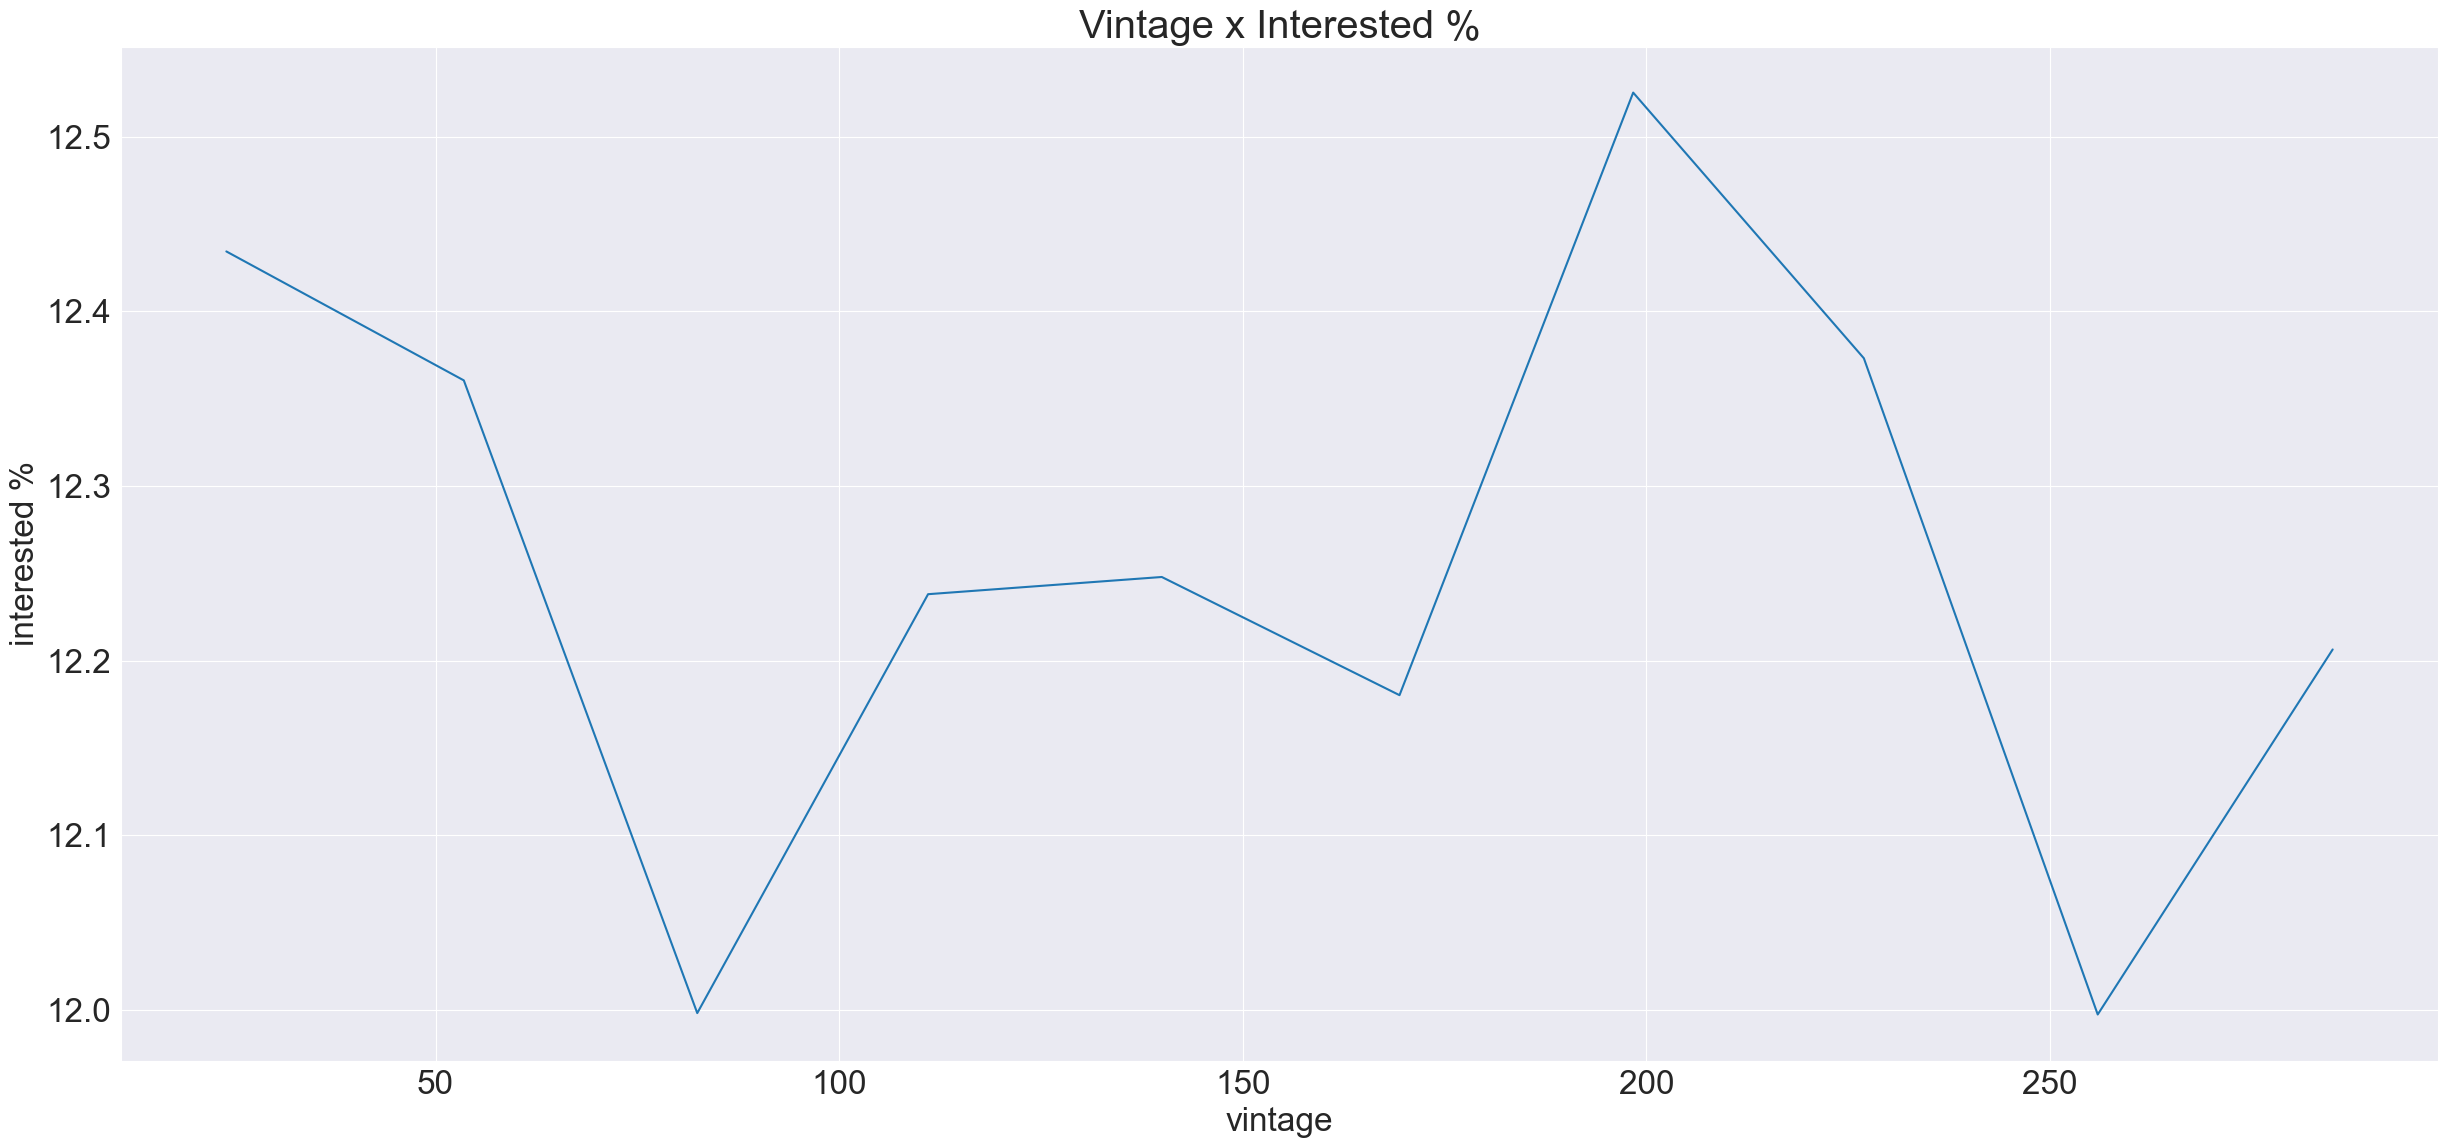

In [39]:
hf.cohort_plot(df2, 'vintage', 'response')

**Now we will look at the percentage of customers that are interested in vehicle insurance by class of the binary and categorical variables.**

**Driving License** , **Previously Insured & Vehicle Damage**

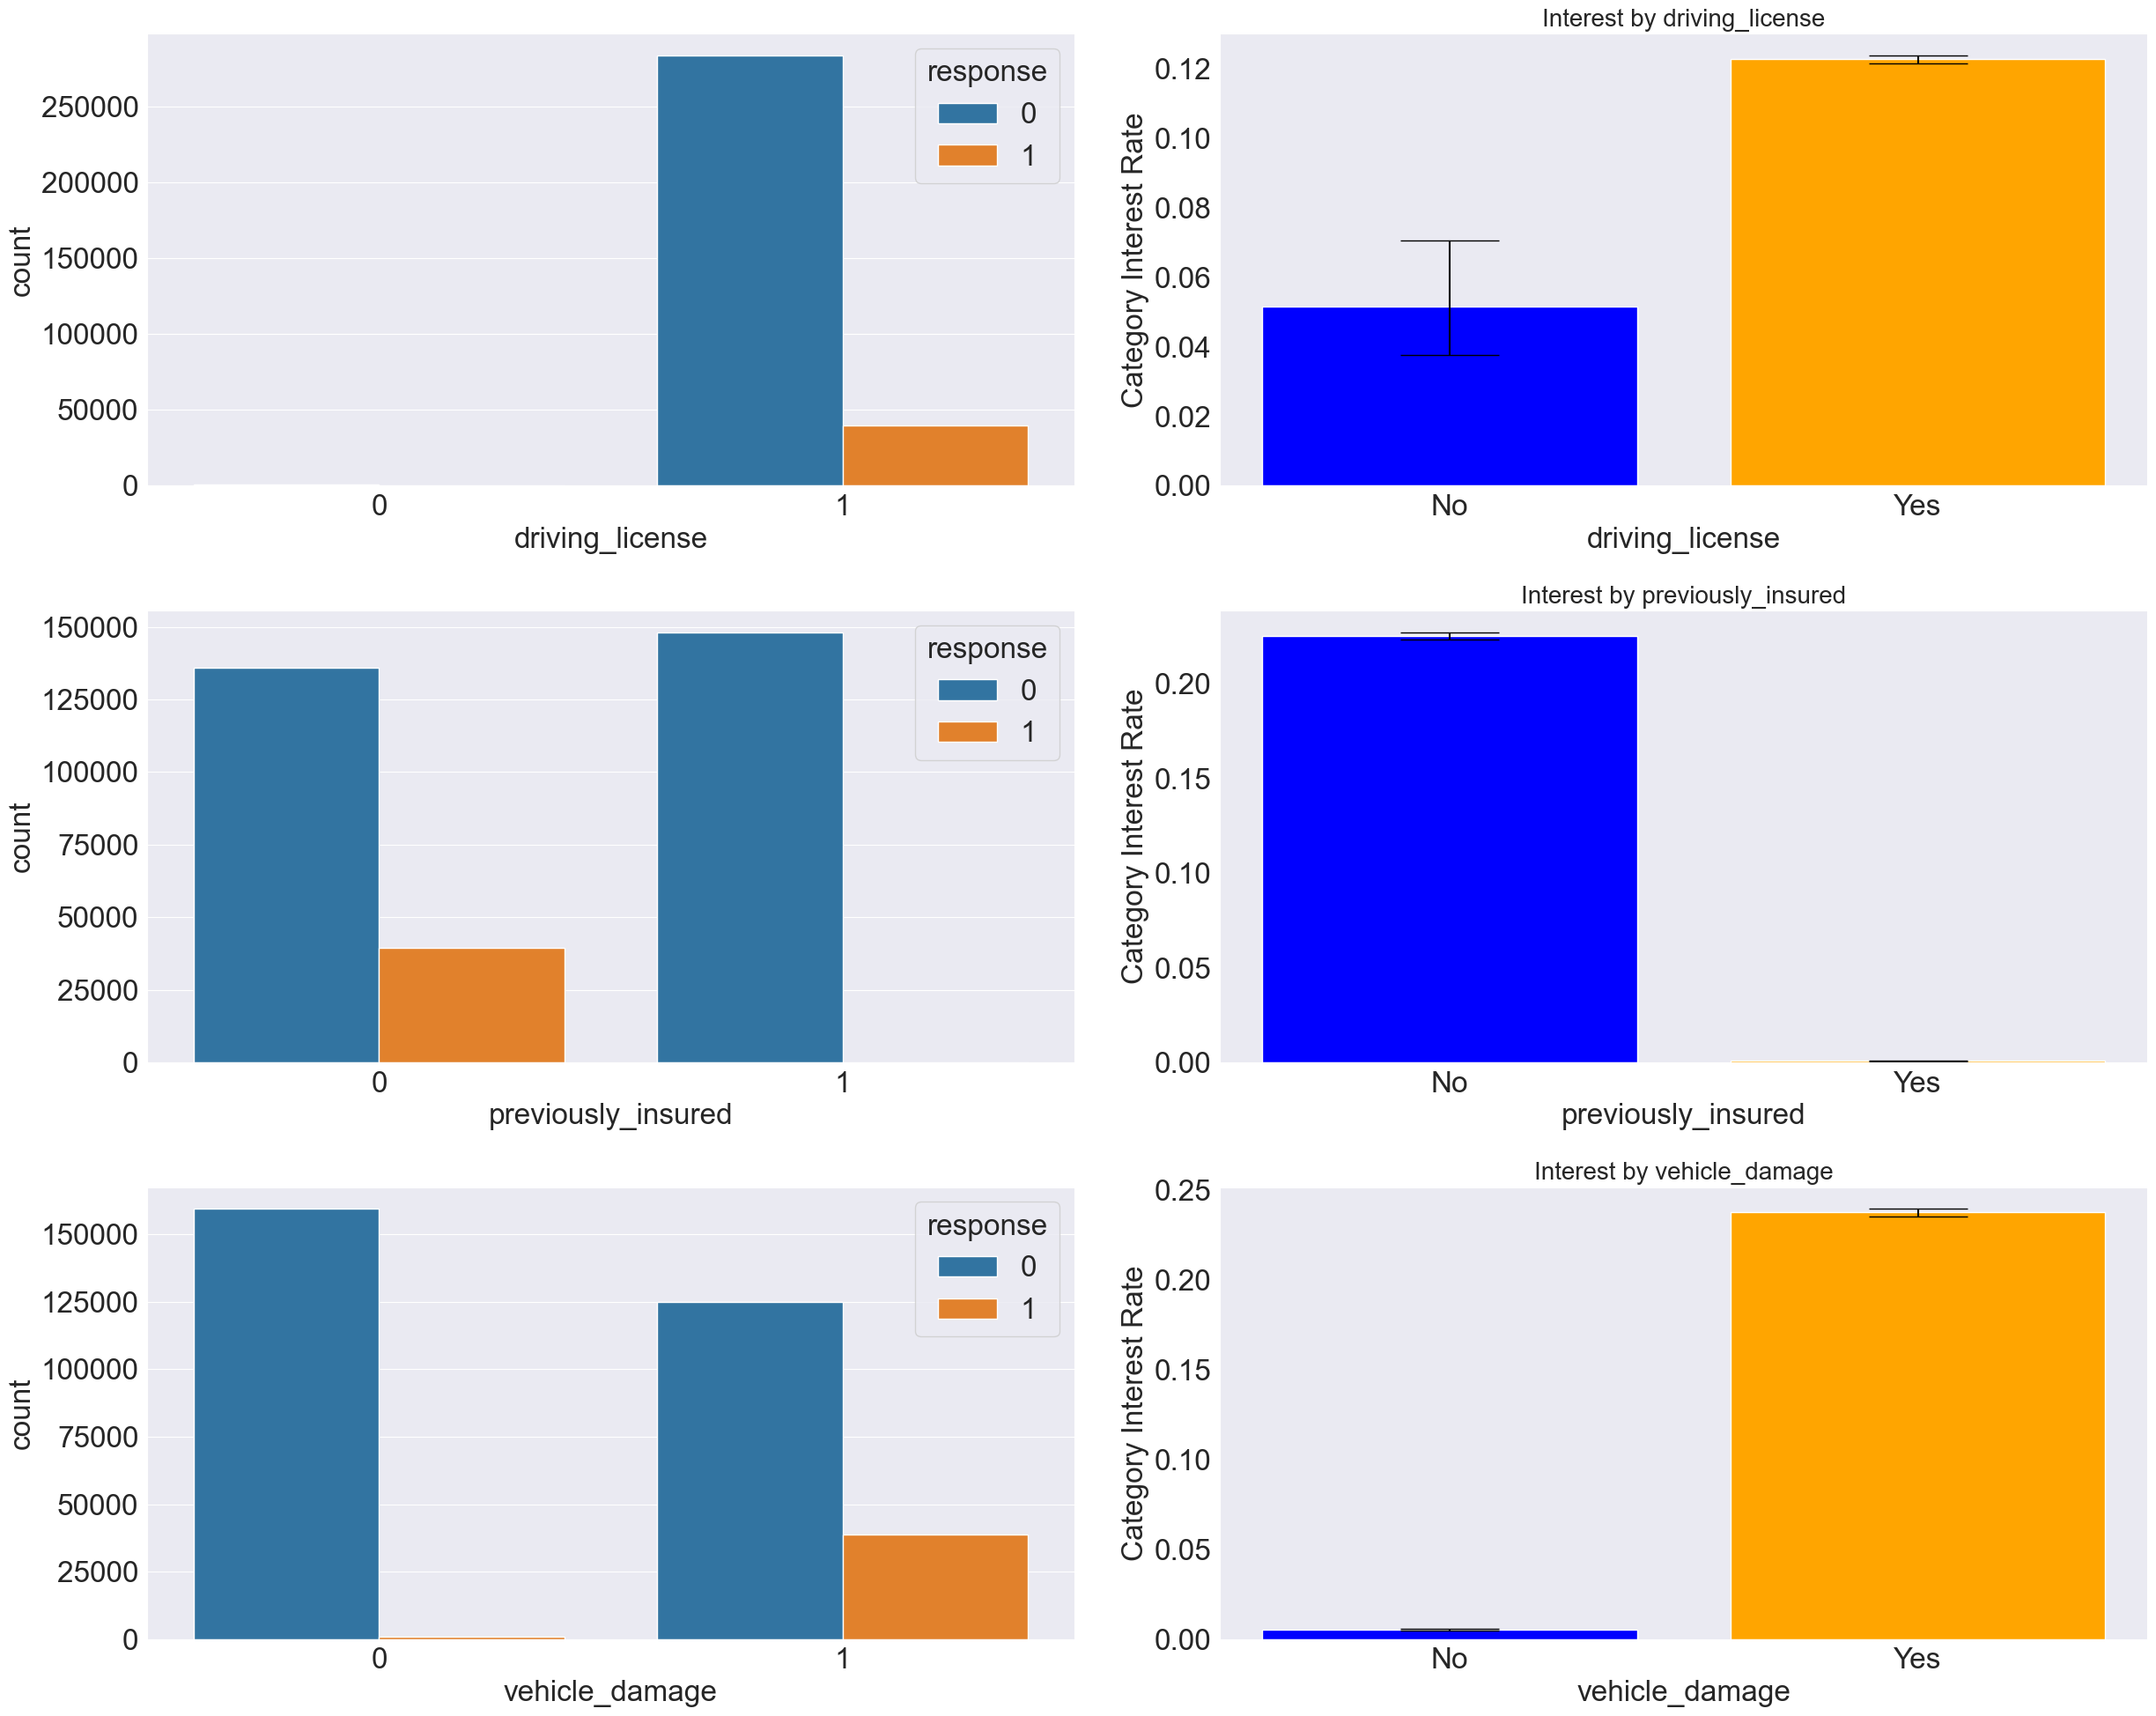

In [40]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 2, 1, )
sns.countplot(hue='response', x='driving_license', data=df3)

plt.subplot(3, 2, 2)
hf.cohort_plot_cat(df3, 'driving_license', 'response')
plt.ylim(0, )

plt.subplot(3, 2, 3)
sns.countplot(hue='response', x='previously_insured', data=df3)

plt.subplot(3, 2, 4)
hf.cohort_plot_cat(df2, 'previously_insured', 'response')
plt.ylim(0, )

plt.subplot(3, 2, 5)
sns.countplot(hue='response', x='vehicle_damage', data=df3)

plt.subplot(3, 2, 6)
hf.cohort_plot_cat(df2, 'vehicle_damage', 'response')
plt.ylim(0, );

As expected, people without driving license have less interest in vehicle insurance. 
OBS: only 0.2% of the customers don't have a driving license, so this variable may not be so relevant for our model.

Almost none of the people who already have vehicle insurance showed interest. This is also true for people who didn't get their vehicle damaged in the past.

**Gender & Vehicle Age**

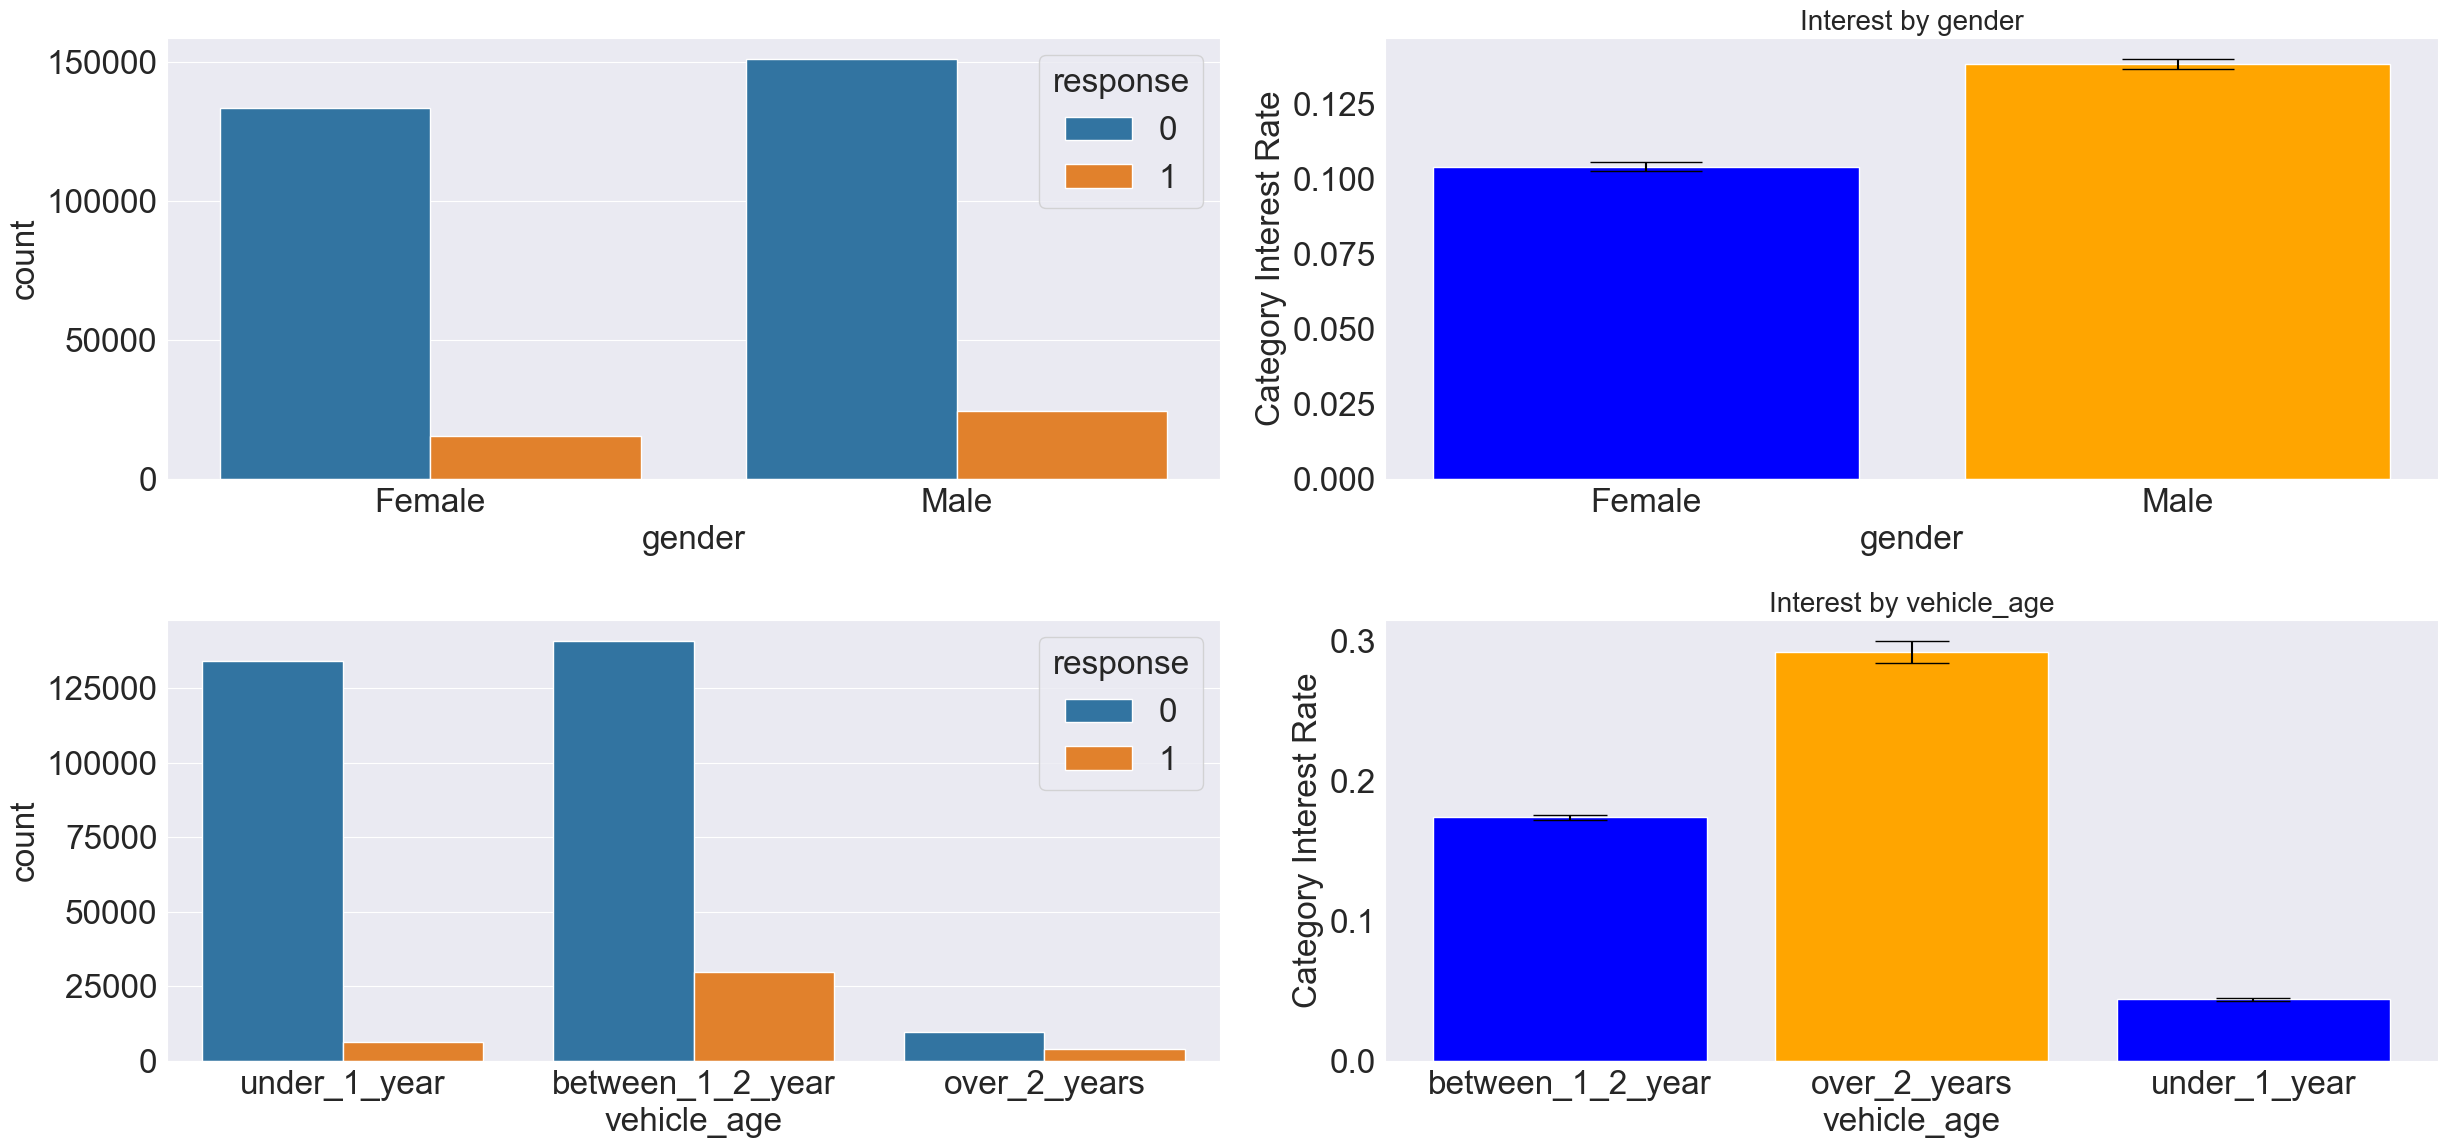

In [41]:
plt.subplot(2, 2, 1)
sns.countplot(hue='response', x='gender', data=df3)

plt.subplot(2, 2, 2)
hf.cohort_plot_cat(df3, 'gender', 'response')
plt.ylim(0, )


plt.subplot(2, 2, 3)
sns.countplot(hue='response', x='vehicle_age', data=df3)

plt.subplot(2, 2, 4)
hf.cohort_plot_cat(df2, 'vehicle_age', 'response', )
plt.ylim(0, );

Almost 14% of men are interested in vehicle insurance, while only a little bit above 10% of women showed interest in vehicle insurance.

Almost 30% of the customer that have an over 2 years old vehicle showed interest in vehicle insurance (the overall percentage is only 12.26%). For customers who have a 1 to 2 years old vehicle, almost 18% showed interest in vehicle insurance.


**Region Code**

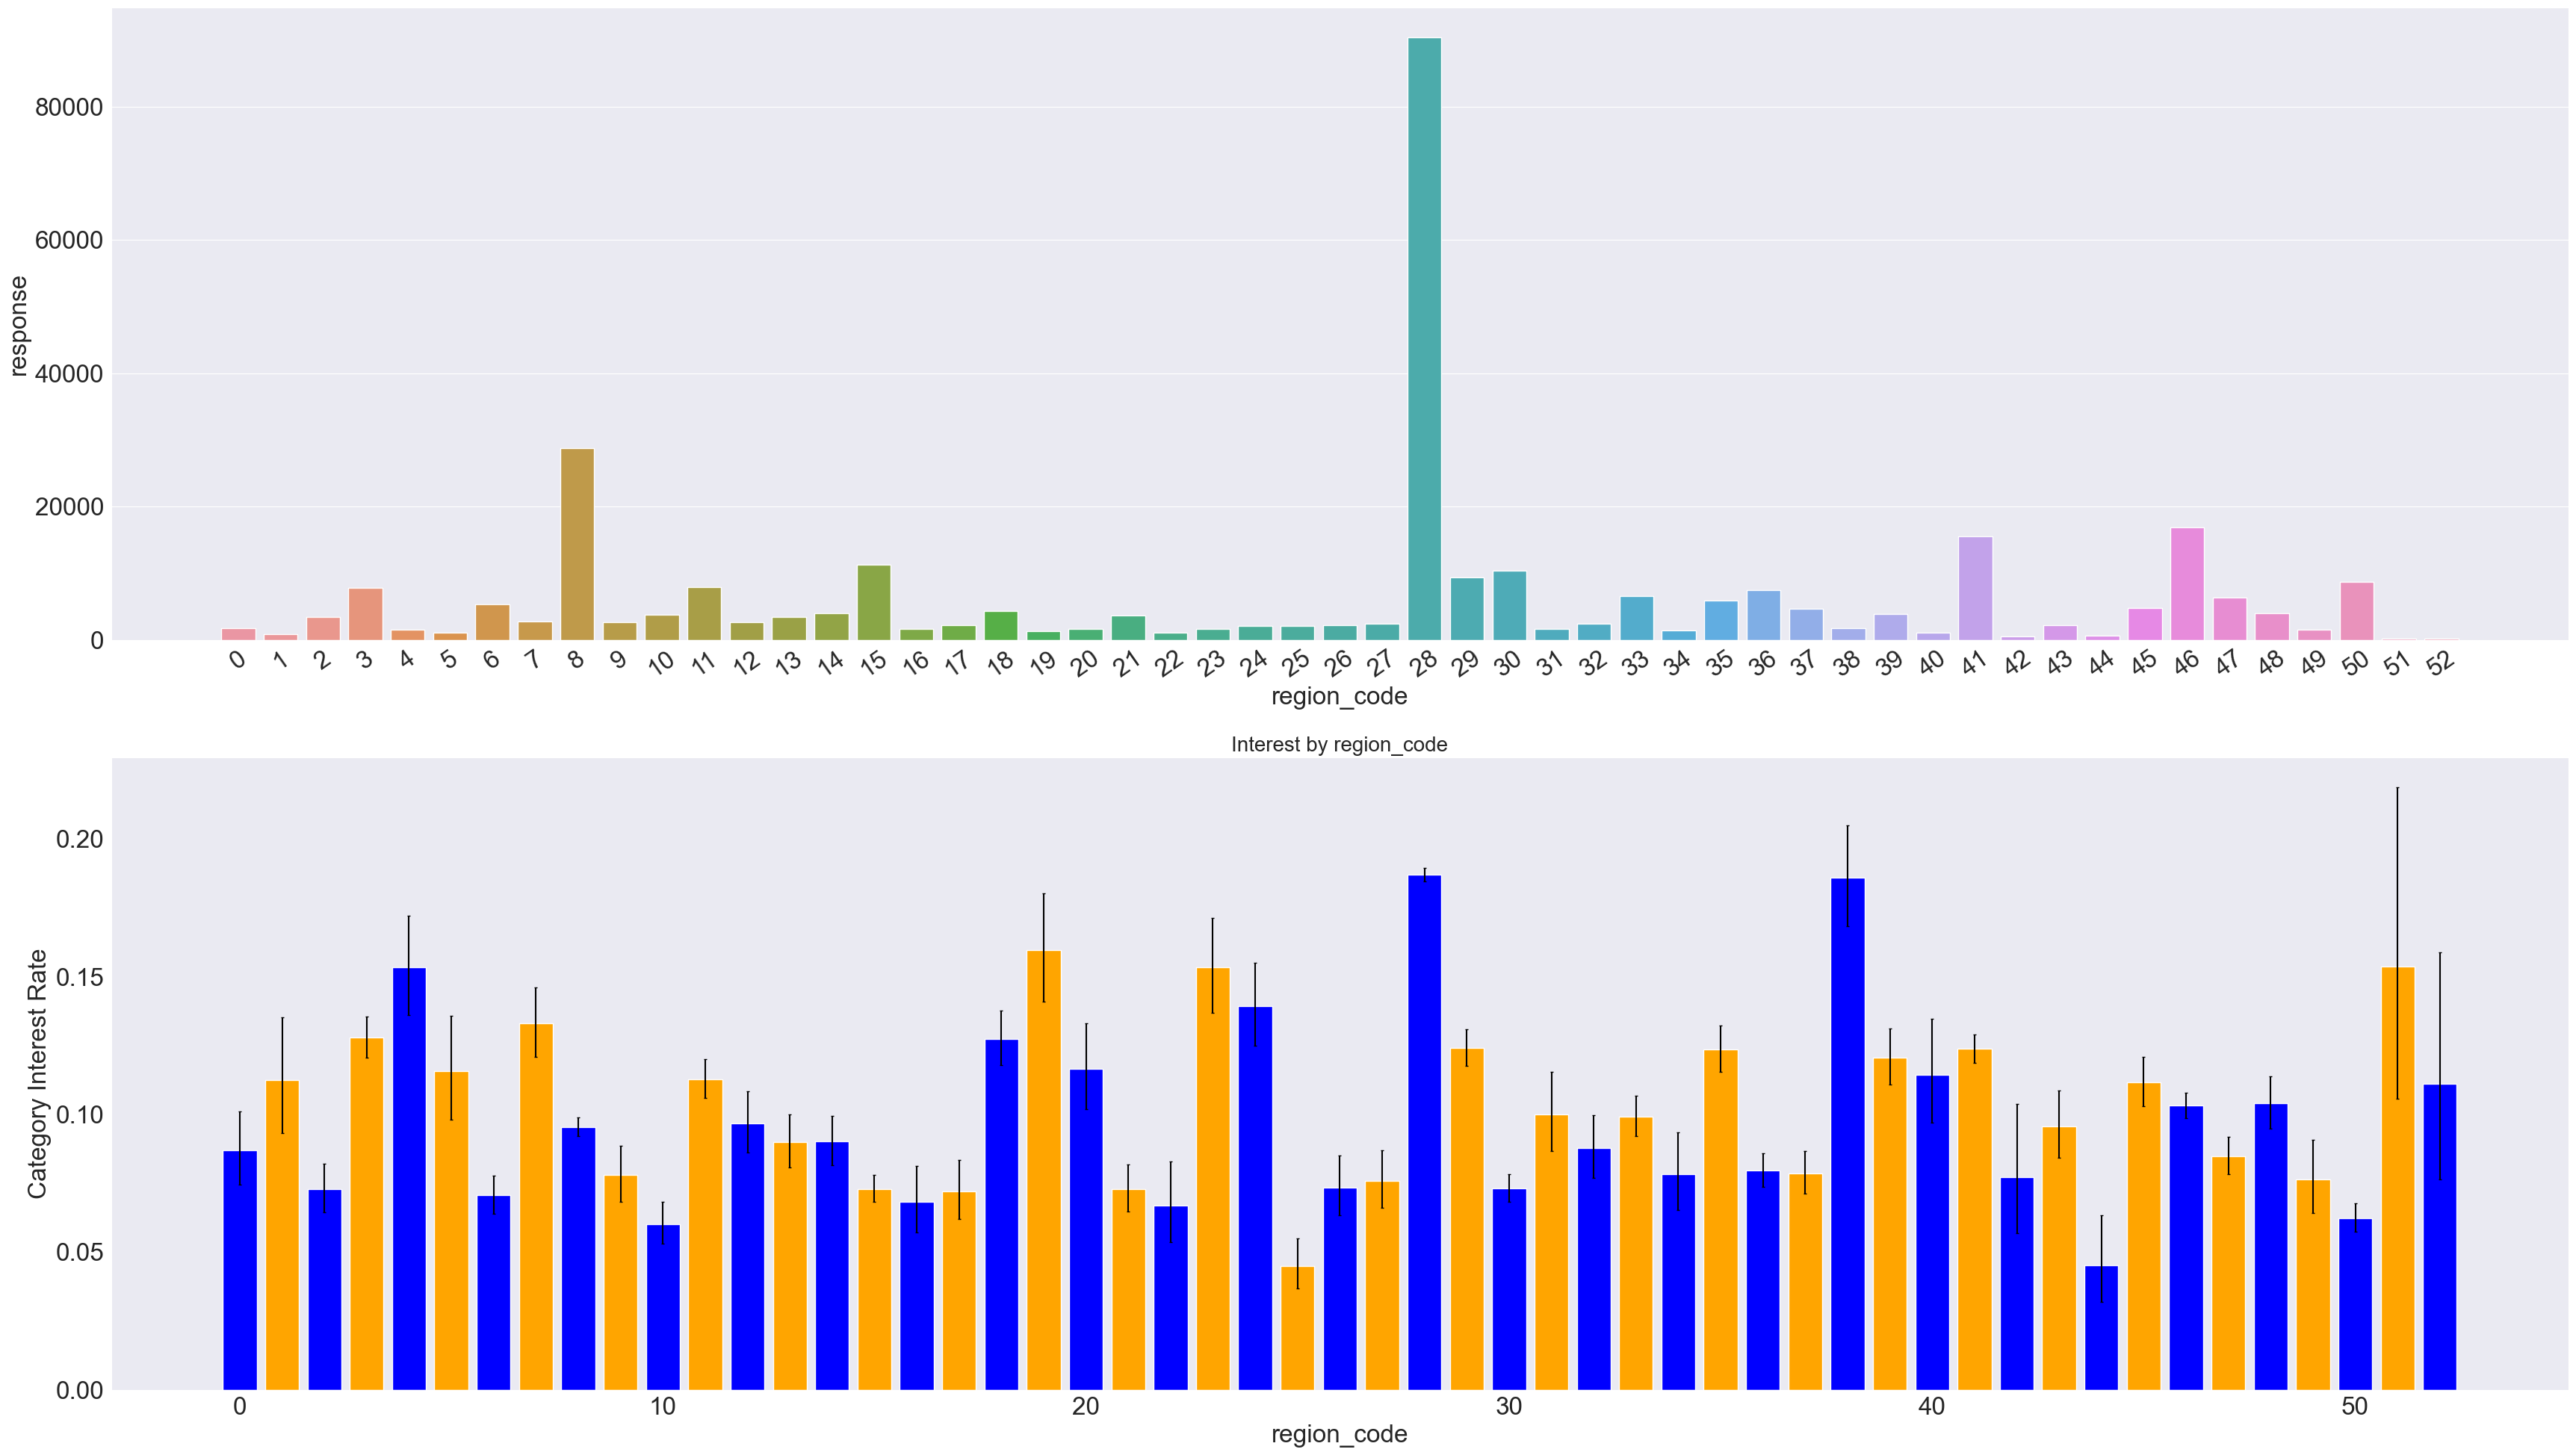

In [42]:
plt.figure(figsize=(35, 20))

plot_df = df3.copy()
plot_df['region_code'] = plot_df['region_code'].astype('int64')
aux = plot_df[['region_code', 'response']].groupby(['region_code']).count().reset_index()

plt.subplot(2, 1, 1)
sns.barplot(x='region_code', y='response', data=aux, )
plt.xlim(-3, 55)
plt.xticks(rotation=35);

plt.subplot(2, 1, 2)
hf.cohort_plot_cat(plot_df, 'region_code', 'response', transform=False);

We can see a lot of variation in the percentage of people interested in vehicle insurance by region code. But there are too many regions with a tiny share of customers, making it hard to draw any conclusions. We also don't know the meaning of the region code; otherwise, it would be possible to try to group some regions to conduct a better analysis of this variable.

**Policy Sales Channel**

In [43]:
aux = df3[['policy_sales_channel', 'response']].groupby('policy_sales_channel').mean()
aux['not_interested'] = 1 - aux['response']

<BarContainer object of 154 artists>

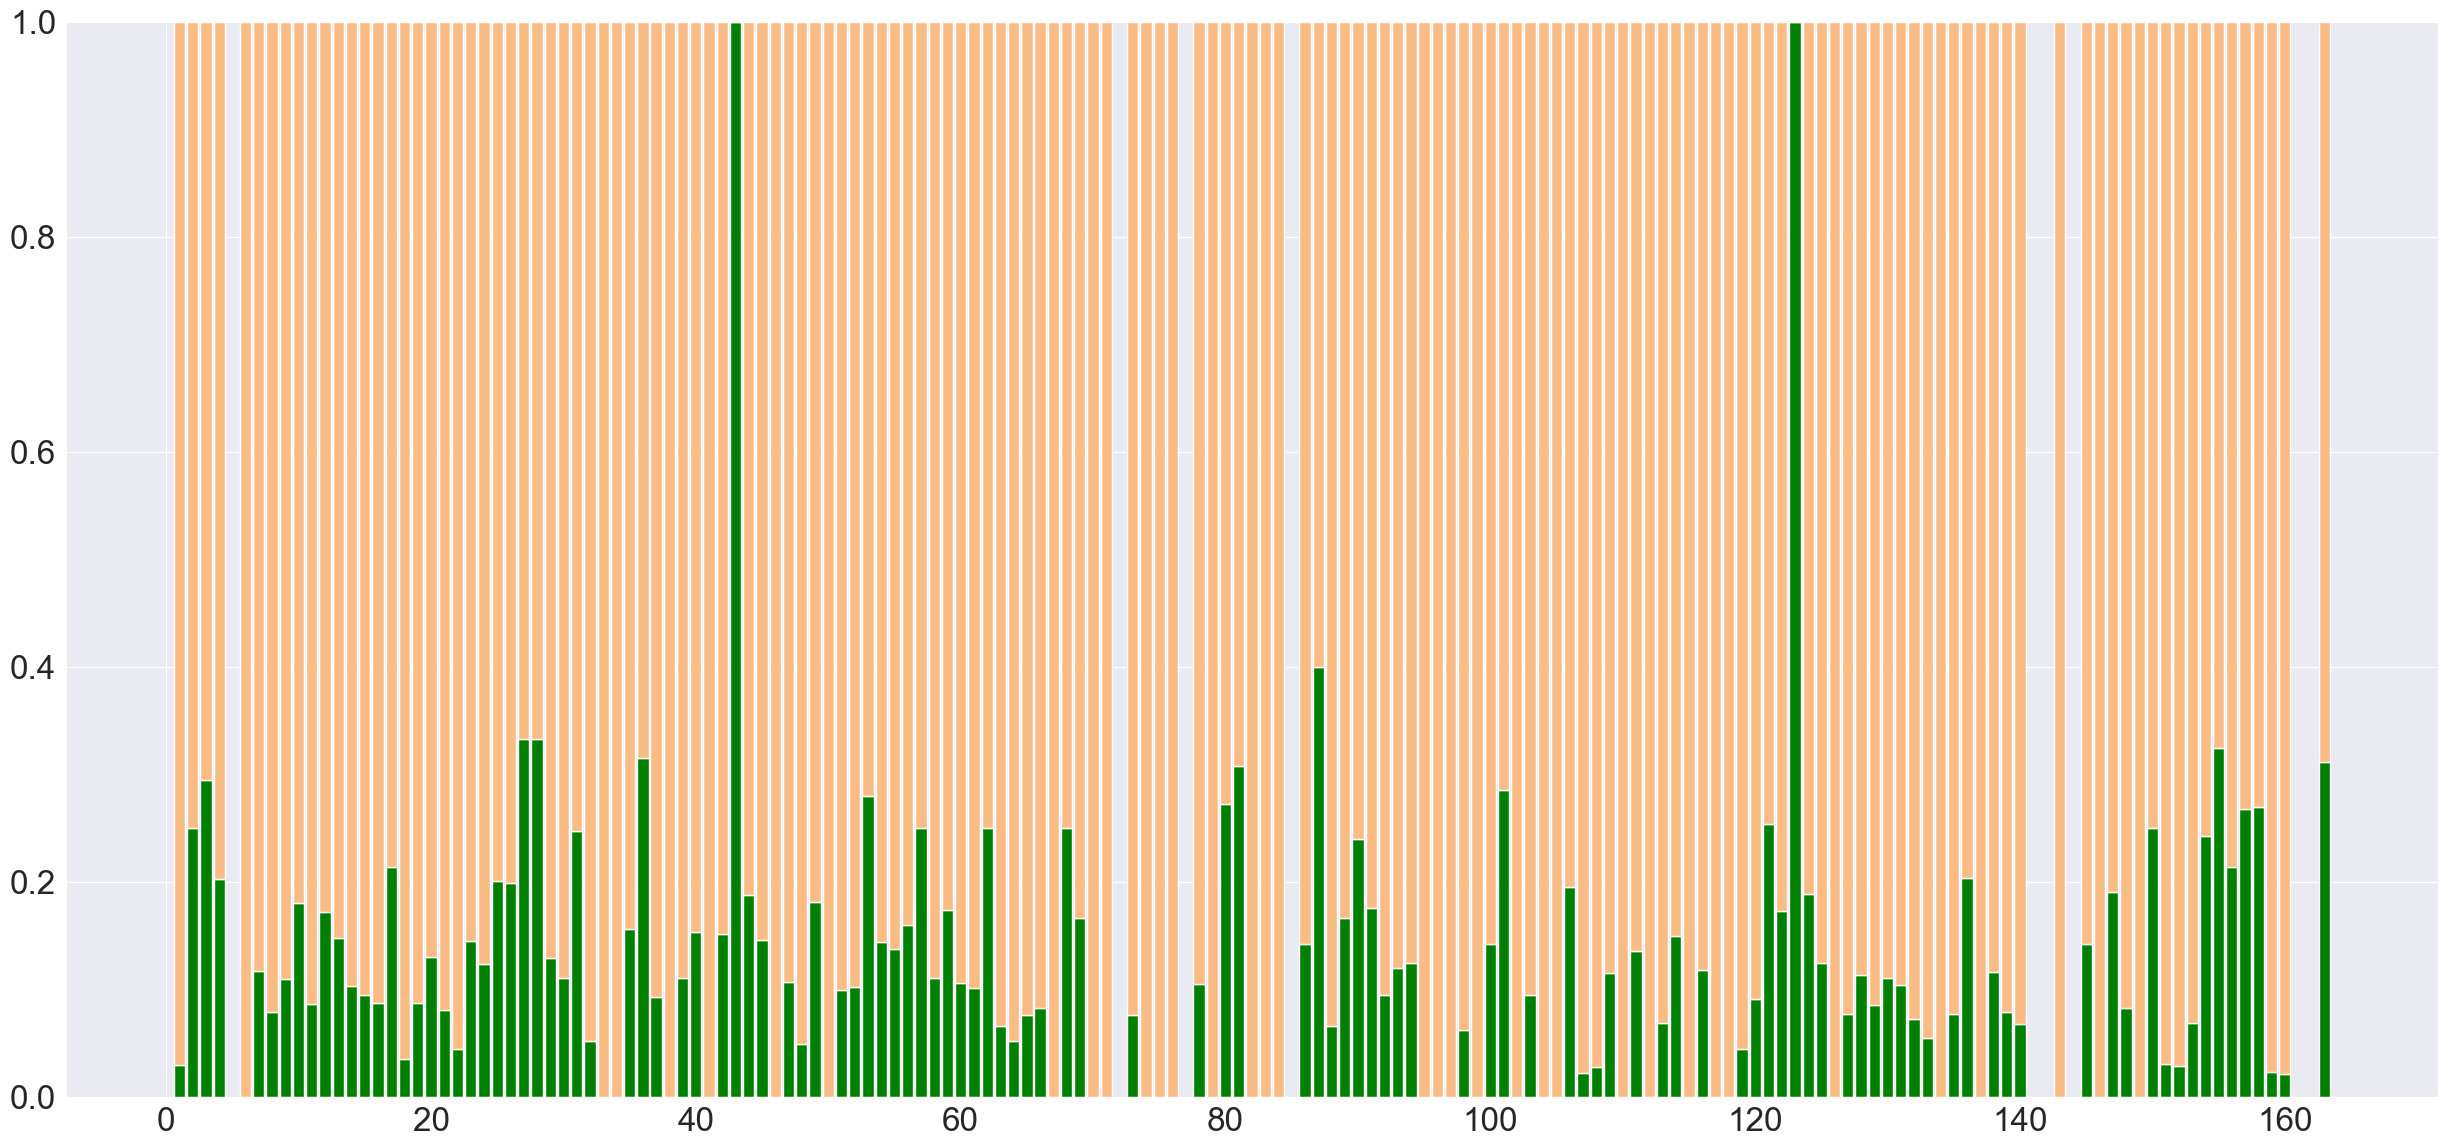

In [44]:
barwidth = 0.85
plt.bar(aux.index, aux['response'], color='#008000', edgecolor='white', width=barwidth)
plt.bar(aux.index, aux['not_interested'], bottom=aux['response'], color='#f9bc86', width=barwidth)
#plt.set_xticklabels(aux.index)
#plt.bar()

## 4.2. Bivariate Analysis

### 4.2.1. Numerical x Numerical

<AxesSubplot:xlabel='vintage', ylabel='annual_premium'>

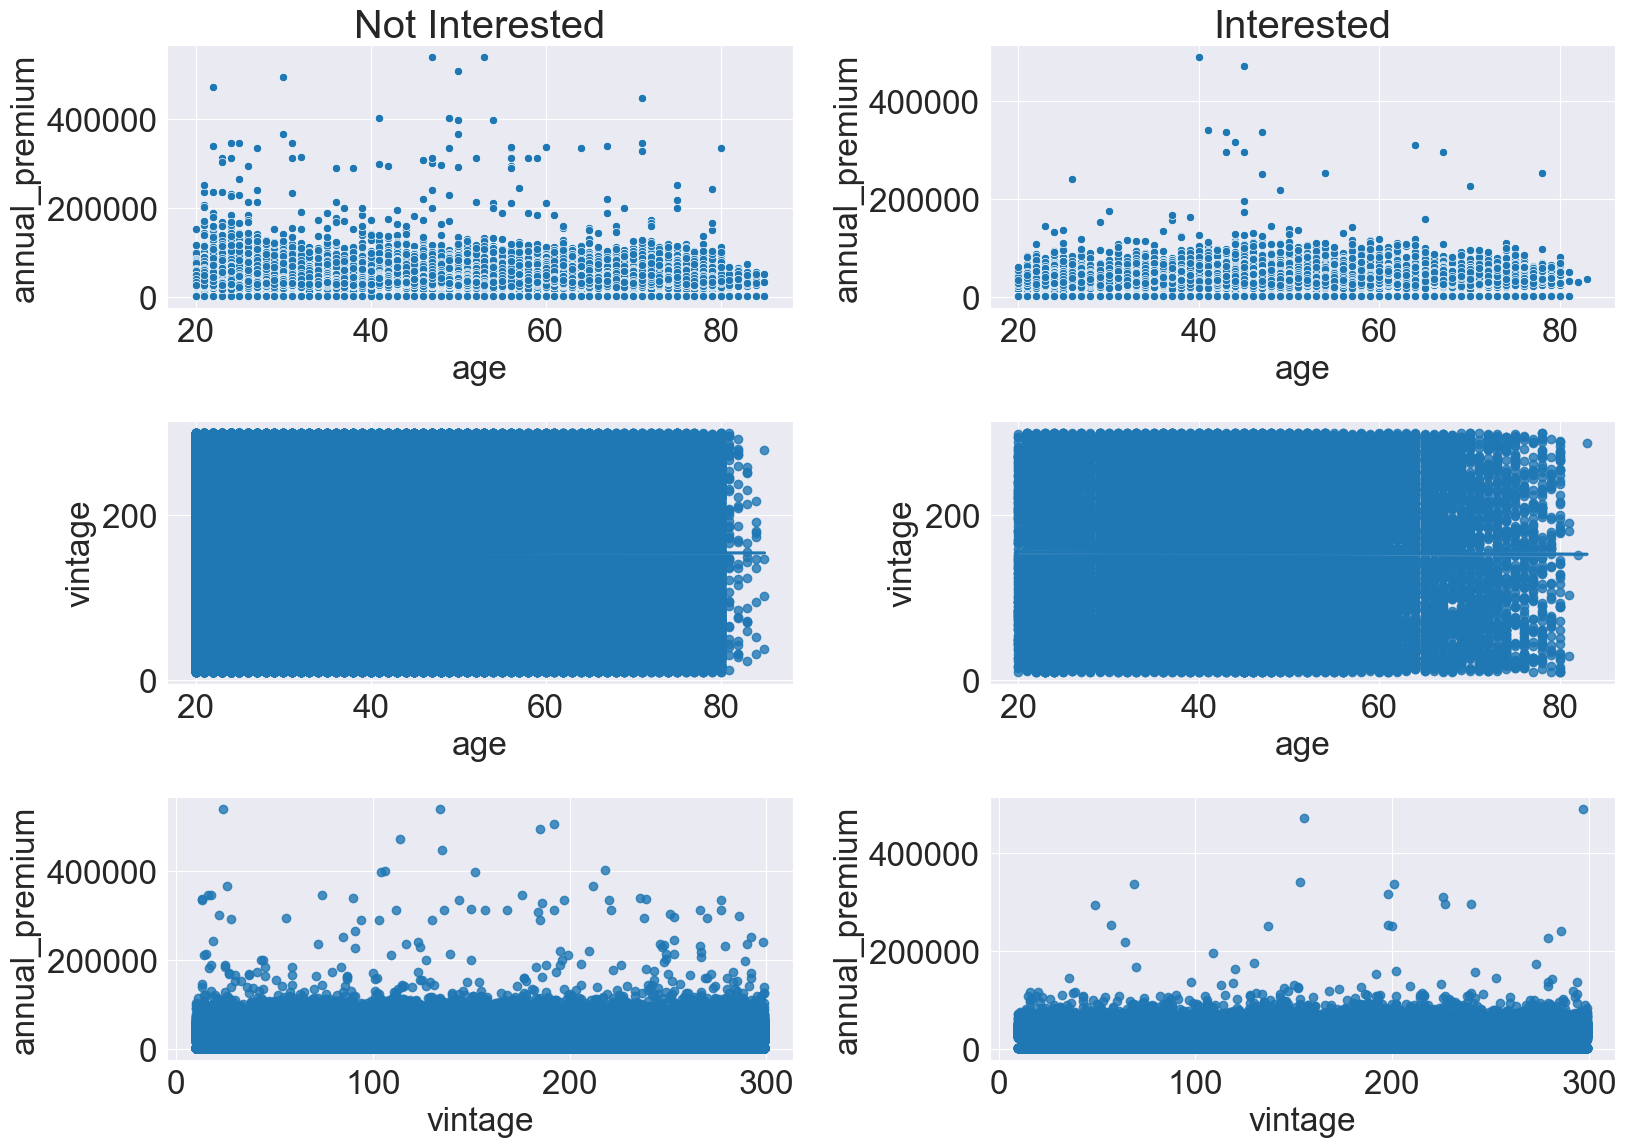

In [45]:
aux_0 = df3.query('response == 0')
aux_1 = df3.query('response == 1')

grid = GridSpec(3, 3)

plt.subplot(grid[0, 0])
plt.title('Not Interested')
sns.scatterplot(x='age', y='annual_premium', data=aux_0)
plt.subplot(grid[0, 1])
plt.title('Interested')
sns.scatterplot(x='age', y='annual_premium', data=aux_1)

plt.subplot(grid[1, 0])
sns.regplot(x='age', y='vintage', data=aux_0)
plt.subplot(grid[1, 1])
sns.regplot(x='age', y='vintage', data=aux_1)

plt.subplot(grid[2, 0])
sns.regplot(x='vintage', y='annual_premium', data=aux_0)
plt.subplot(grid[2, 1])
sns.regplot(x='vintage', y='annual_premium', data=aux_1)

### 4.2.1. Numerical x Categorical

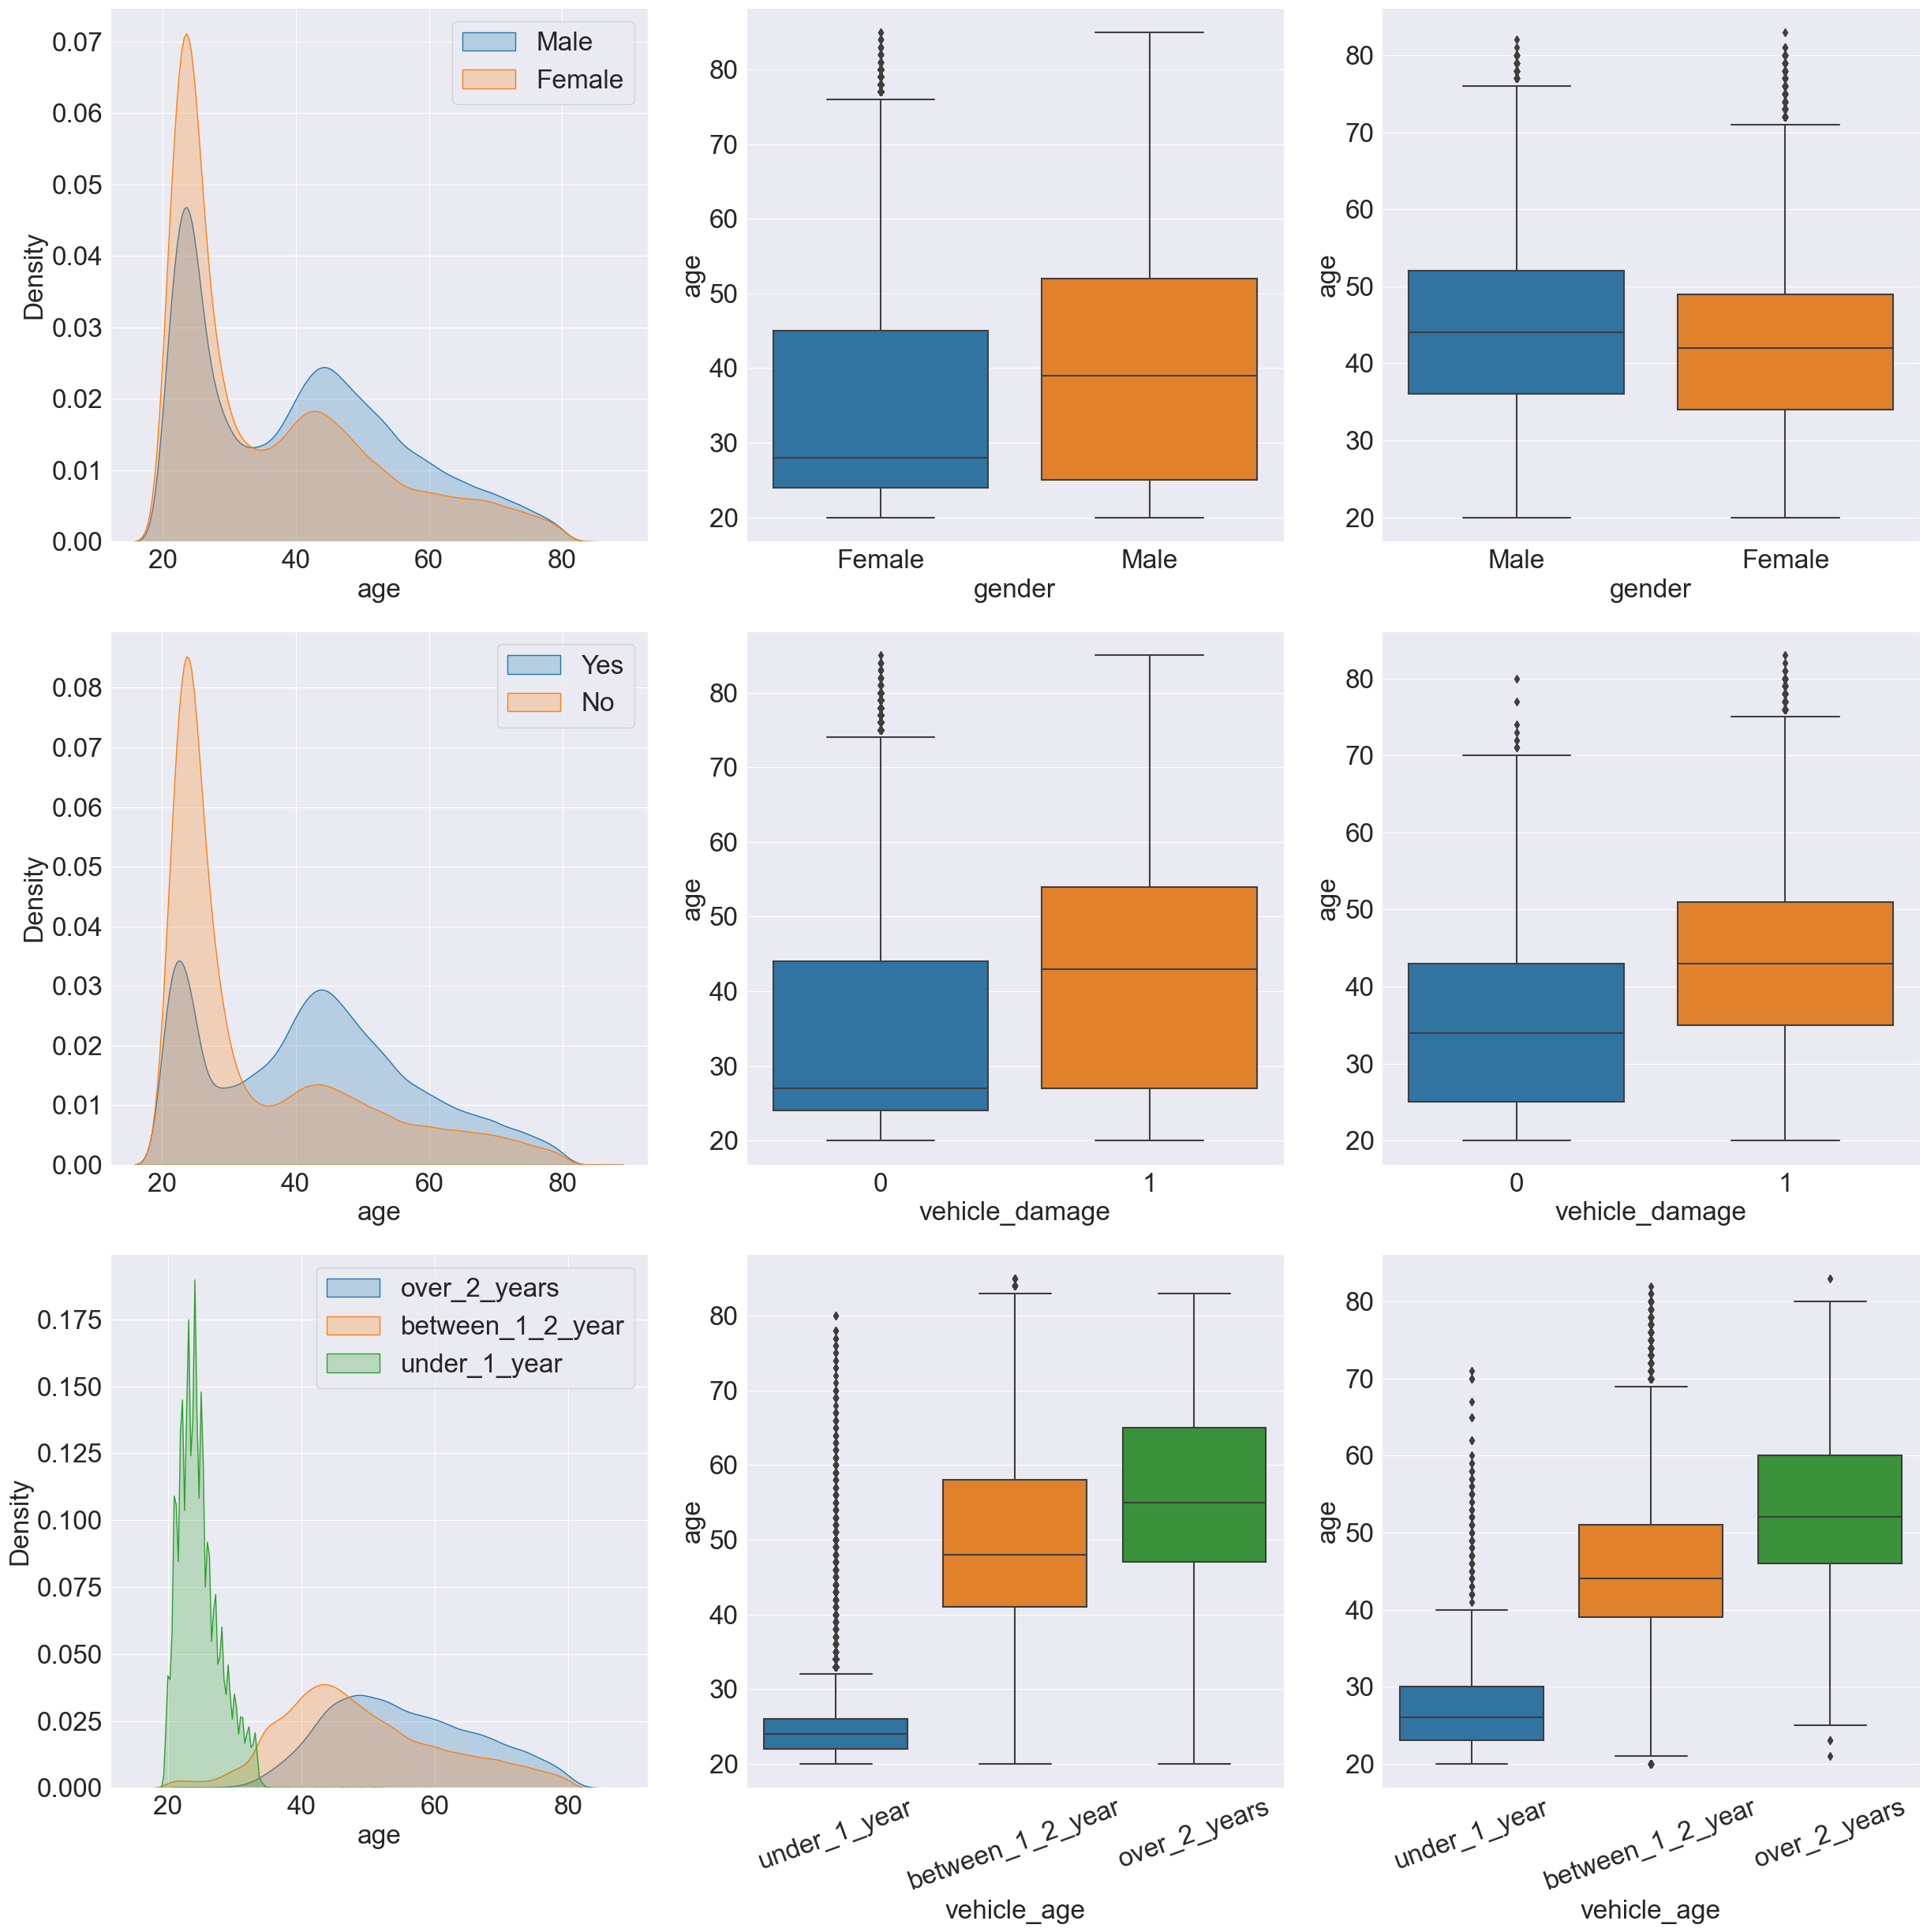

In [46]:
plt.figure(figsize=(25, 25))
grid = GridSpec(3,3)

plt.subplot(grid[0, 0])
sns.kdeplot(x='age', data=df3.query("gender == 'Male'"), shade=True, label='Male')
sns.kdeplot(x='age', data=df3.query("gender == 'Female'"), shade=True, label='Female')
plt.legend()

plt.subplot(grid[0, 1])
sns.boxplot(x='gender', y='age', data=aux_0)


plt.subplot(grid[0, 2])
sns.boxplot(x='gender', y='age', data=aux_1)


plt.subplot(grid[1, 0])
sns.kdeplot(x='age', data=df3.query("vehicle_damage == 1"), shade=True, label='Yes')
sns.kdeplot(x='age', data=df3.query("vehicle_damage == 0"), shade=True, label='No')
plt.legend(loc='best')

plt.subplot(grid[1, 1])
sns.boxplot(x='vehicle_damage', y='age', data=aux_0)

plt.subplot(grid[1, 2])
sns.boxplot(x='vehicle_damage', y='age', data=aux_1)

plt.subplot(grid[2, 0])
sns.kdeplot(x='age', data=df3.query("vehicle_age == 'over_2_years'"), shade=True, label='over_2_years')
sns.kdeplot(x='age', data=df3.query("vehicle_age == 'between_1_2_year'"), shade=True, label='between_1_2_year')
sns.kdeplot(x='age', data=df3.query("vehicle_age == 'under_1_year'"), shade=True, label='under_1_year')
plt.legend(loc='best')

plt.subplot(grid[2, 1])
sns.boxplot(x='vehicle_age', y='age', data=aux_0, order=df3['vehicle_age'].unique())
plt.xticks(rotation=20)

plt.subplot(grid[2, 2])
sns.boxplot(x='vehicle_age', y='age', data=aux_1)
plt.xticks(rotation=20);

We can see that age has a similar distribution by gender, with the male class having a little bit more older people. Also, the median age of females who are interested in vehicle insurance is way higher than those who are not interested. For males, the difference is not very significant.

For vehicle damage, the age distribution is not so similar. We can see that people that didn't have vehicle damage in the past have a higher concentration at lower ages.

For vehicle age, the age distribution is very different. Most people with a car that have less than a year is in the age range of 20 to 30. We can see a flatter distribution for the other two categories with a concentration in higher ages. The age distribution for people that showed interest in vehicle insurance is not very different from the age distribution for people who didn't show interest.

<AxesSubplot:xlabel='vehicle_age', ylabel='annual_premium'>

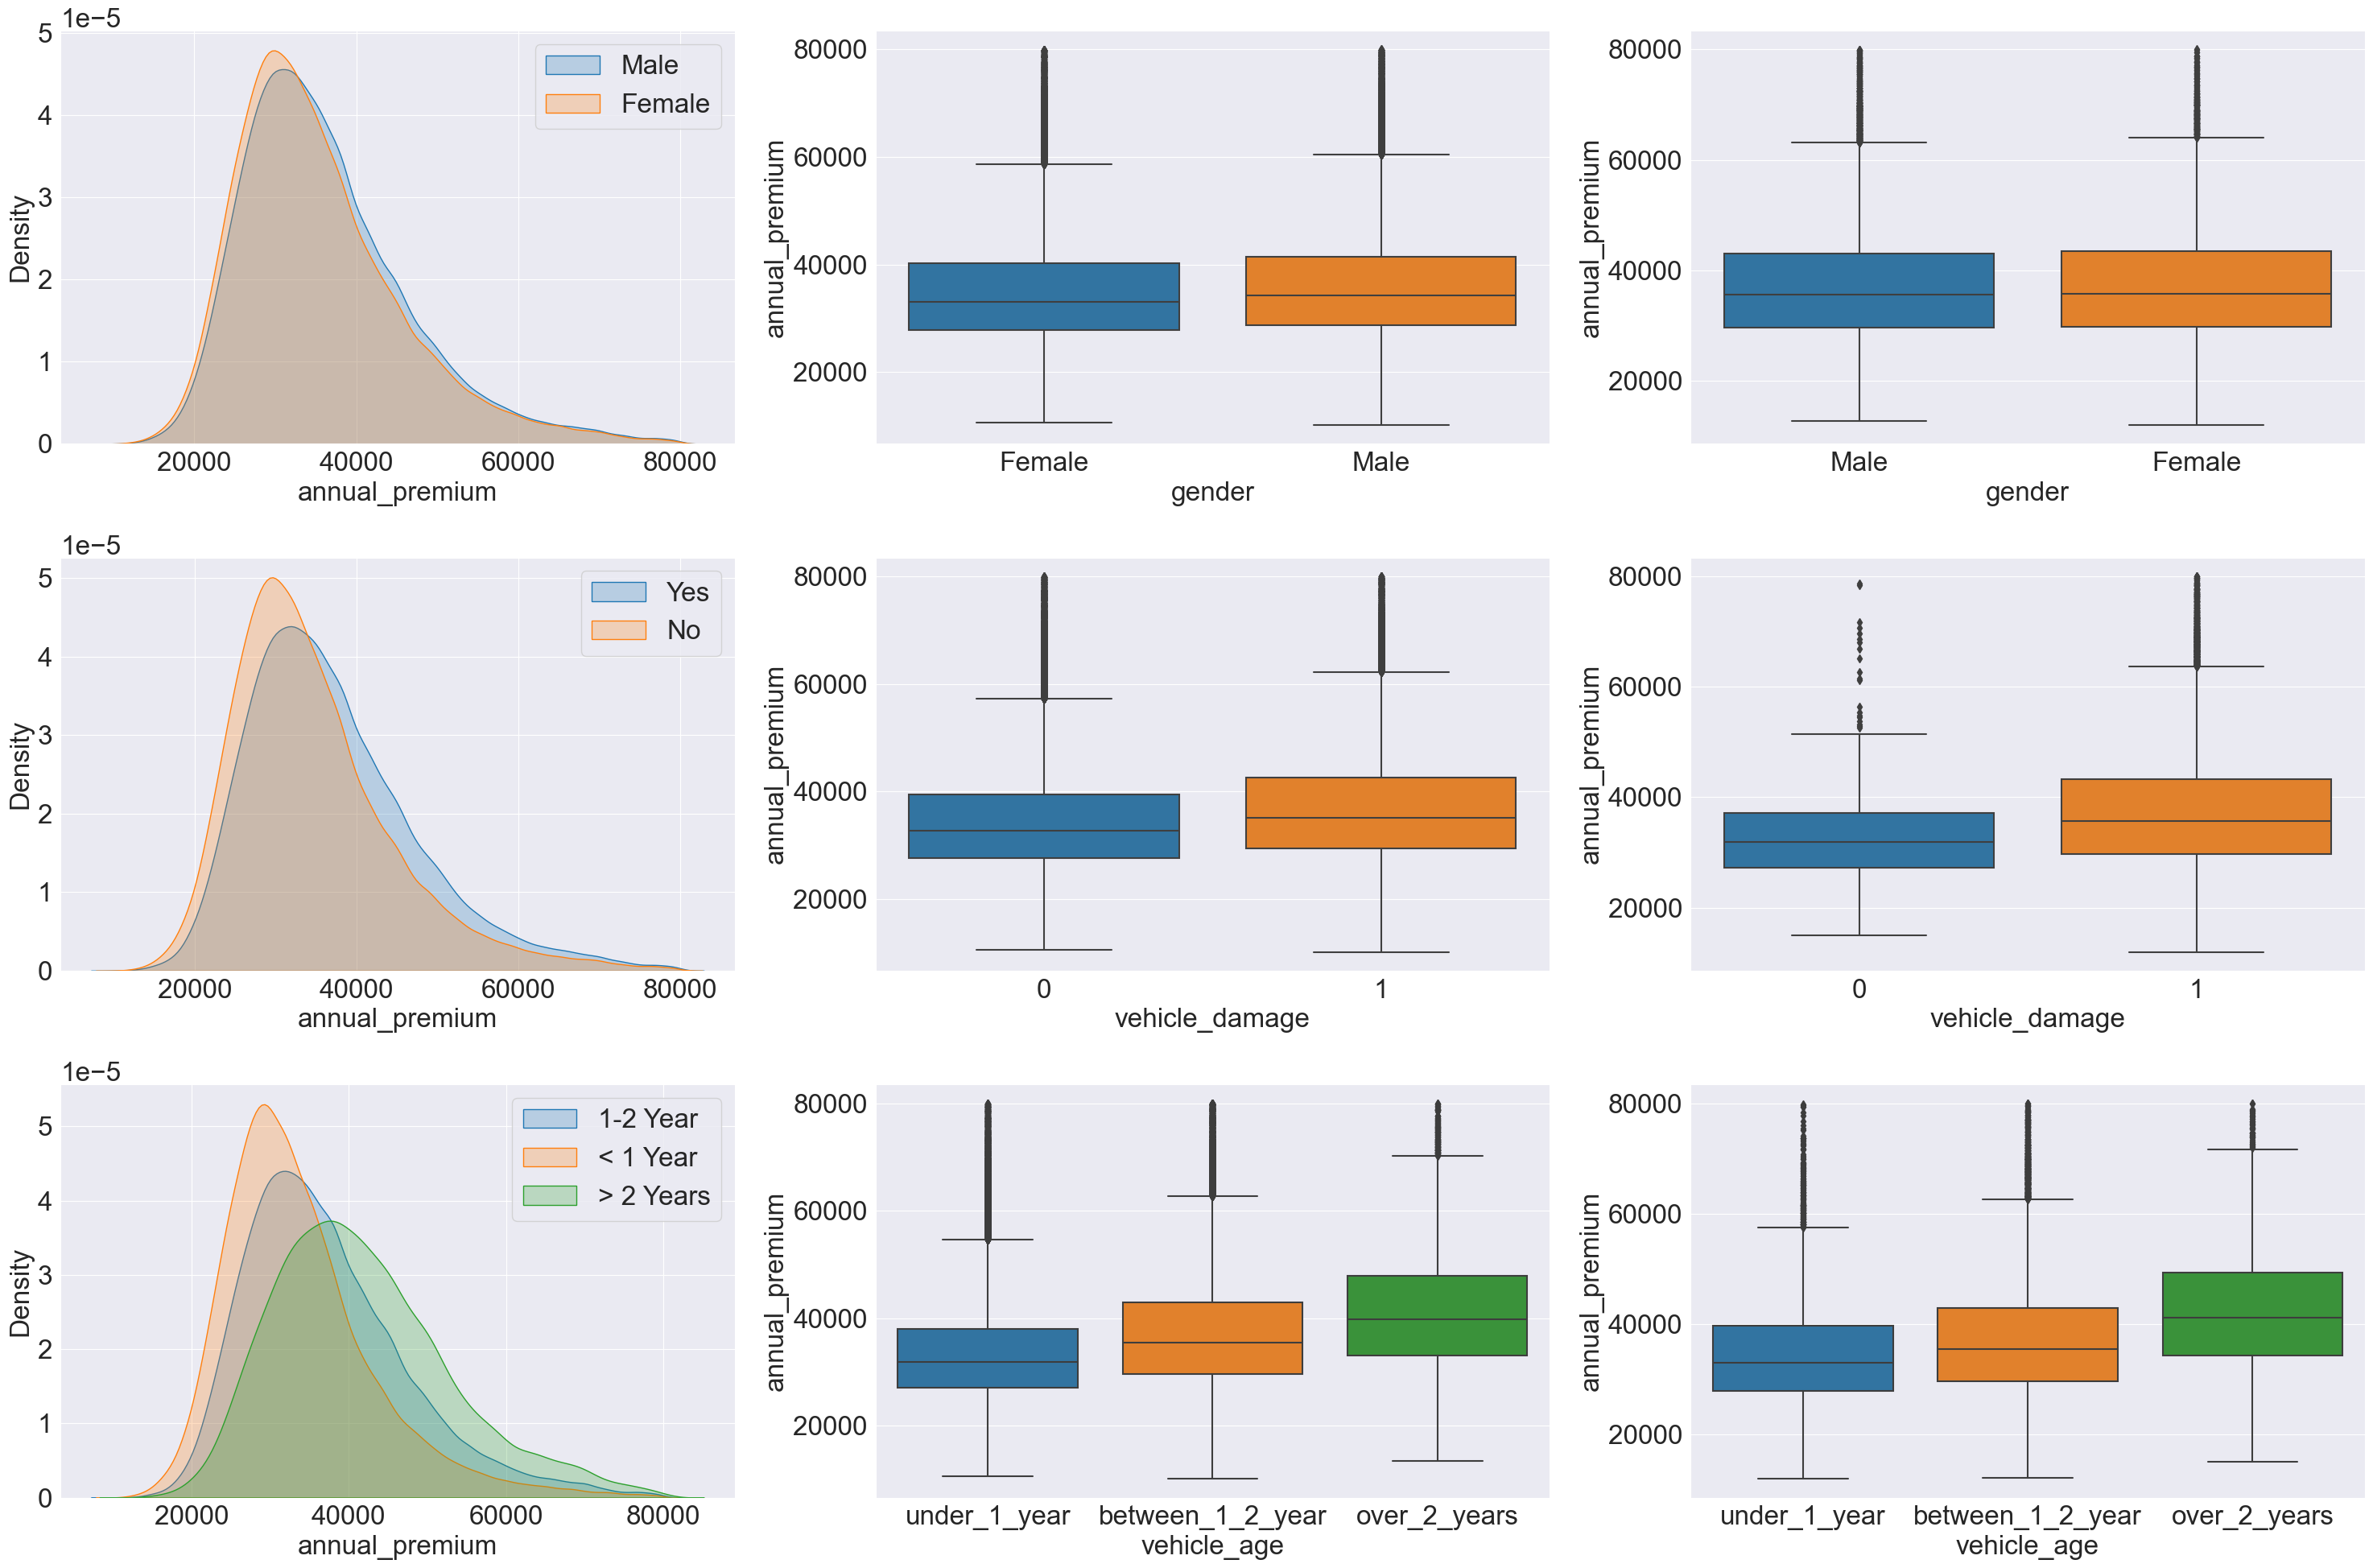

In [47]:
aux = df3.query('annual_premium > 10000 & annual_premium < 80000')

plt.figure(figsize=(30, 20))

grid = GridSpec(3,3)

plt.subplot(grid[0, 0])
sns.kdeplot(x='annual_premium', data=aux.query("gender == 'Male'"), shade=True, label='Male')
sns.kdeplot(x='annual_premium', data=aux.query("gender == 'Female'"), shade=True, label='Female')
plt.legend()

plt.subplot(grid[0, 1])
sns.boxplot(x='gender', y='annual_premium', data=aux.query('response == 0'))

plt.subplot(grid[0, 2])
sns.boxplot(x='gender', y='annual_premium', data=aux.query('response == 1'))

plt.subplot(grid[1, 0])
sns.kdeplot(x='annual_premium', data=aux.query("vehicle_damage == 1"), shade=True, label='Yes')
sns.kdeplot(x='annual_premium', data=aux.query("vehicle_damage == 0"), shade=True, label='No')
plt.legend(loc='best')

plt.subplot(grid[1, 1])
sns.boxplot(x='vehicle_damage', y='annual_premium', data=aux.query('response == 0'))

plt.subplot(grid[1, 2])
sns.boxplot(x='vehicle_damage', y='annual_premium', data=aux.query('response == 1'))

plt.subplot(grid[2, 0])
sns.kdeplot(x='annual_premium', data=aux.query("vehicle_age == 'between_1_2_year'"), shade=True, label='1-2 Year')
sns.kdeplot(x='annual_premium', data=aux.query("vehicle_age == 'under_1_year'"), shade=True, label='< 1 Year')
sns.kdeplot(x='annual_premium', data=aux.query("vehicle_age == 'over_2_years'"), shade=True, label='> 2 Years')
plt.legend(loc='best')

plt.subplot(grid[2, 1])
sns.boxplot(x='vehicle_age', y='annual_premium', data=aux_0.query('annual_premium > 10000 & annual_premium < 80000'), order=aux_0['vehicle_age'].unique())

plt.subplot(grid[2, 2])
sns.boxplot(x='vehicle_age', y='annual_premium', data=aux_1.query('annual_premium > 10000 & annual_premium < 80000'), order=aux_0['vehicle_age'].unique())

The annual premium distribution is very similar for males and females. This is true even when we split the data into customers who demonstrated interest in vehicle insurance and customers who didn't.

We observe the same thing for vehicle damage.

The annual premium distribution is different for each vehicle age category. We can see higher annual premium for people with older vehicles.

### 4.2.1. Categorical x Categorical

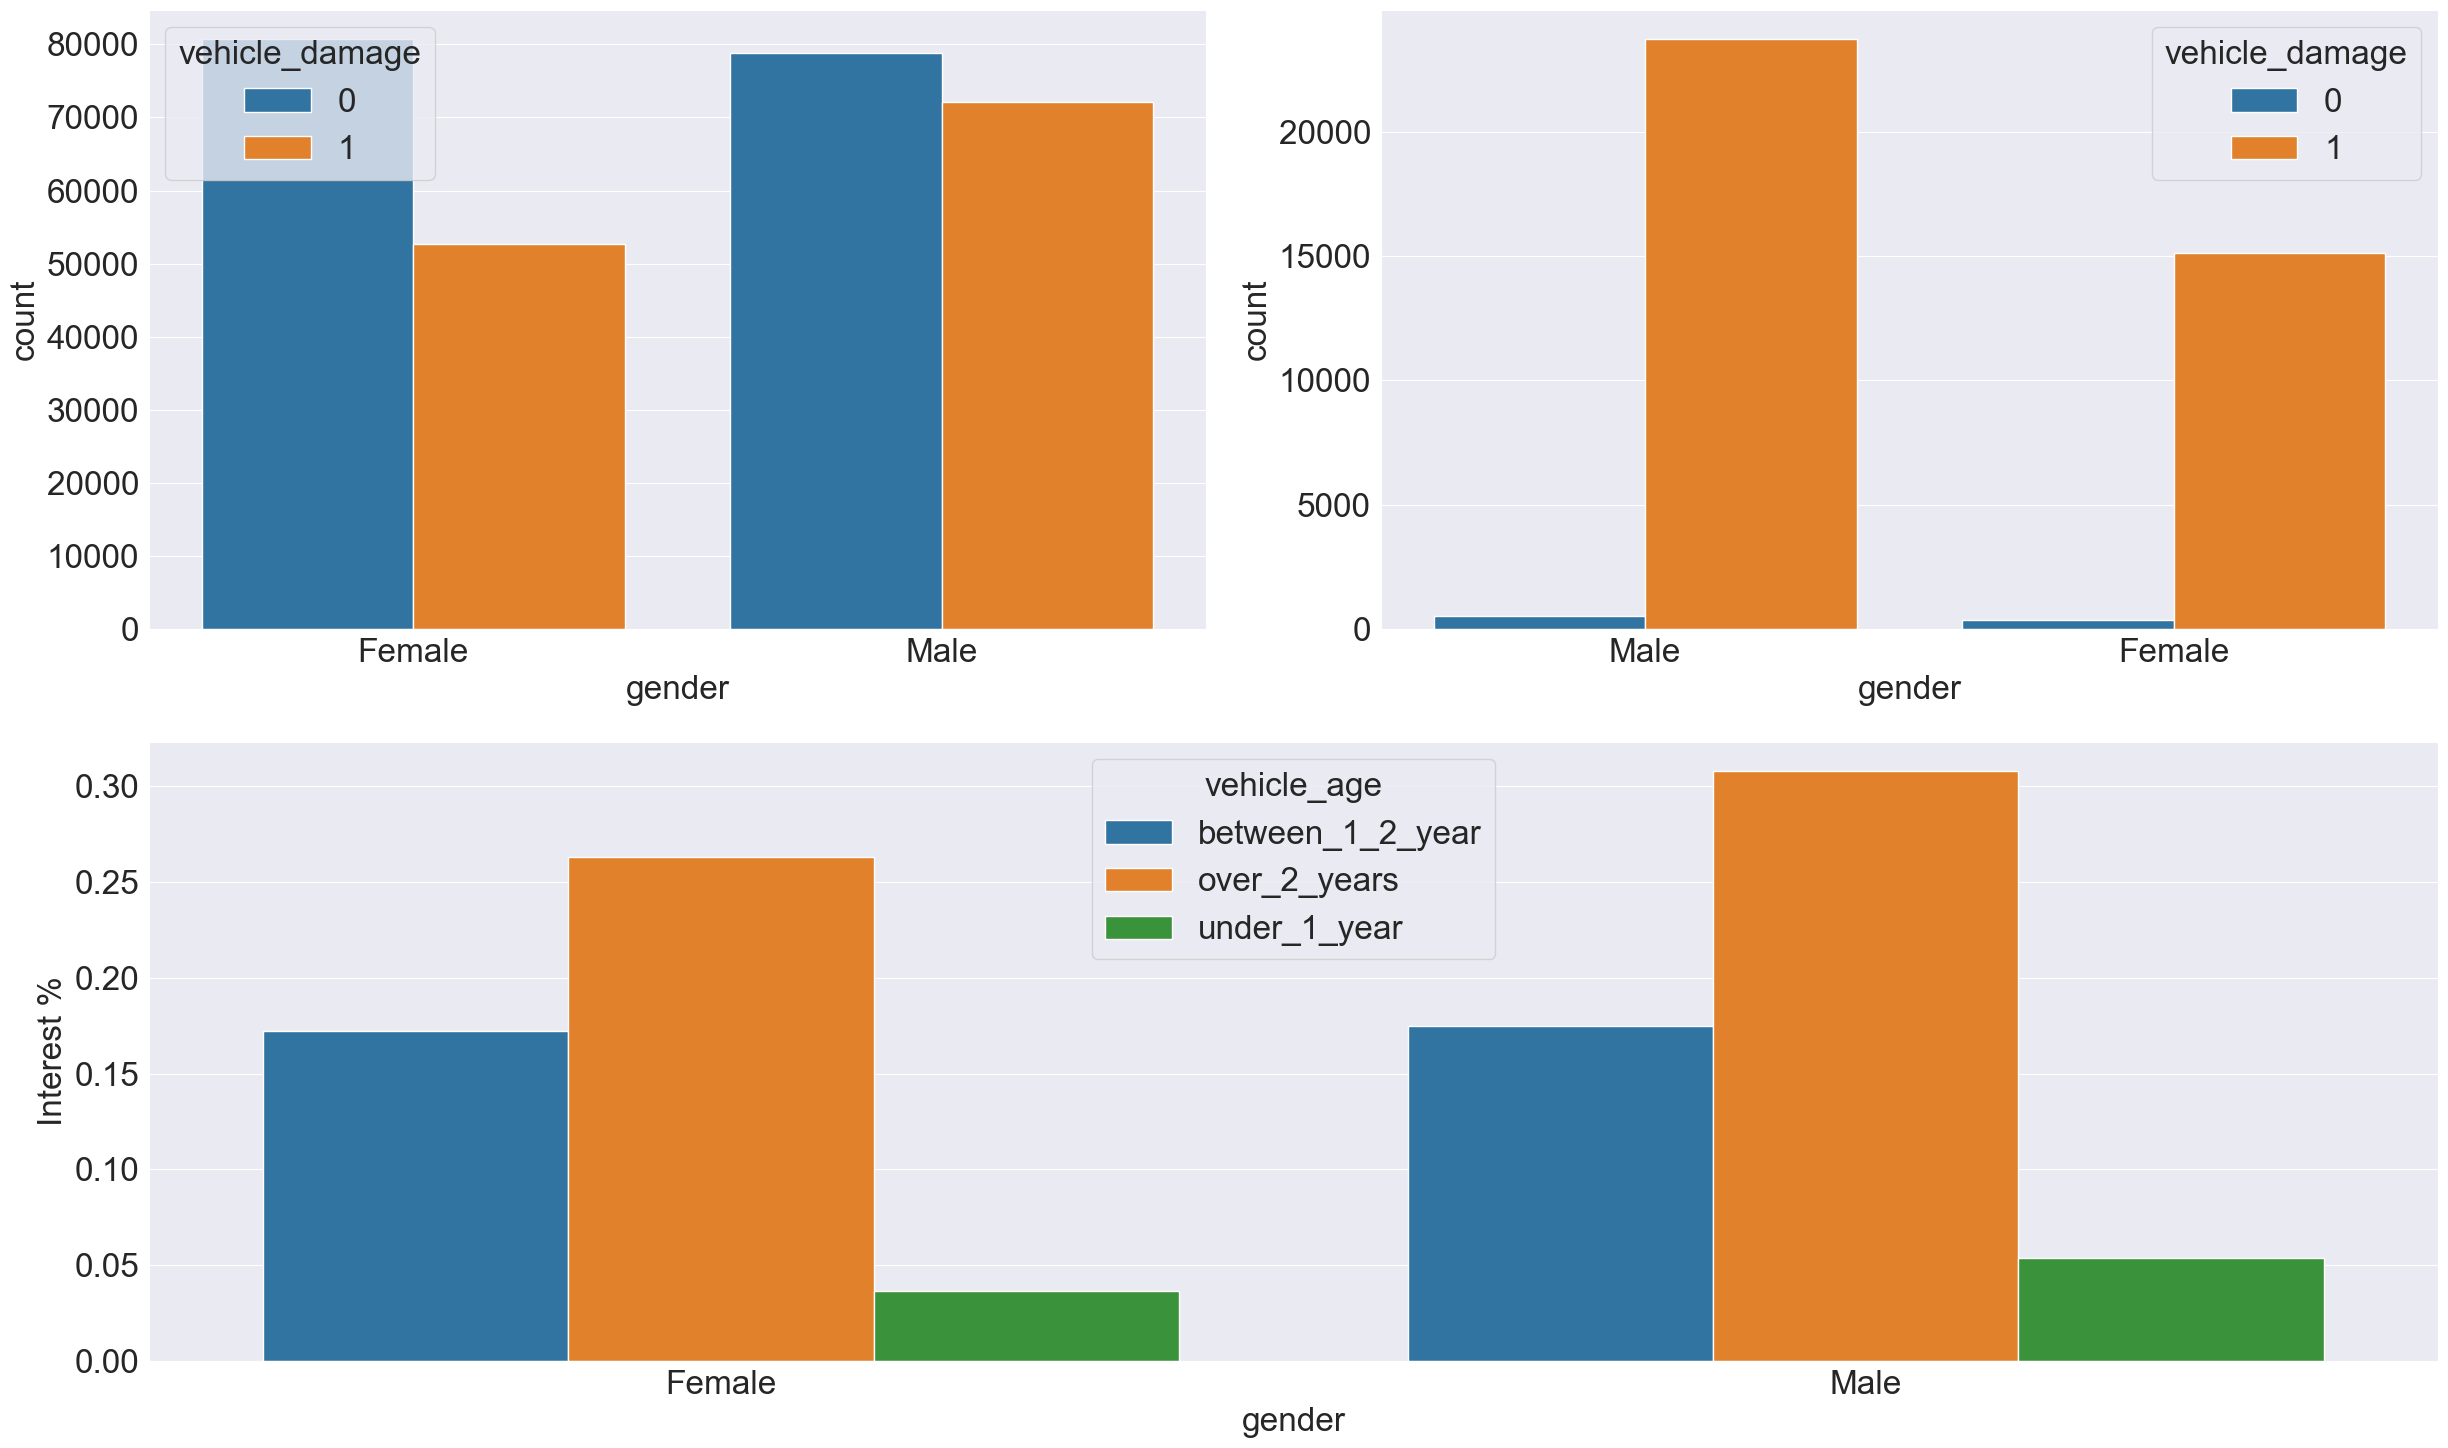

In [48]:
grid = GridSpec(2,2)
plt.figure(figsize=(25, 15))
plt.subplot(grid[0, 0])
sns.countplot(hue='vehicle_damage', x='gender', data=df3.query('response == 0'))

plt.subplot(grid[0, 1])
sns.countplot(hue='vehicle_damage', x='gender', data=df3.query('response == 1'))

plt.ylim(0, )

plt.subplot(grid[1, :])
hf.cohort_2v_cat_plot(df3, 'gender', 'vehicle_age')

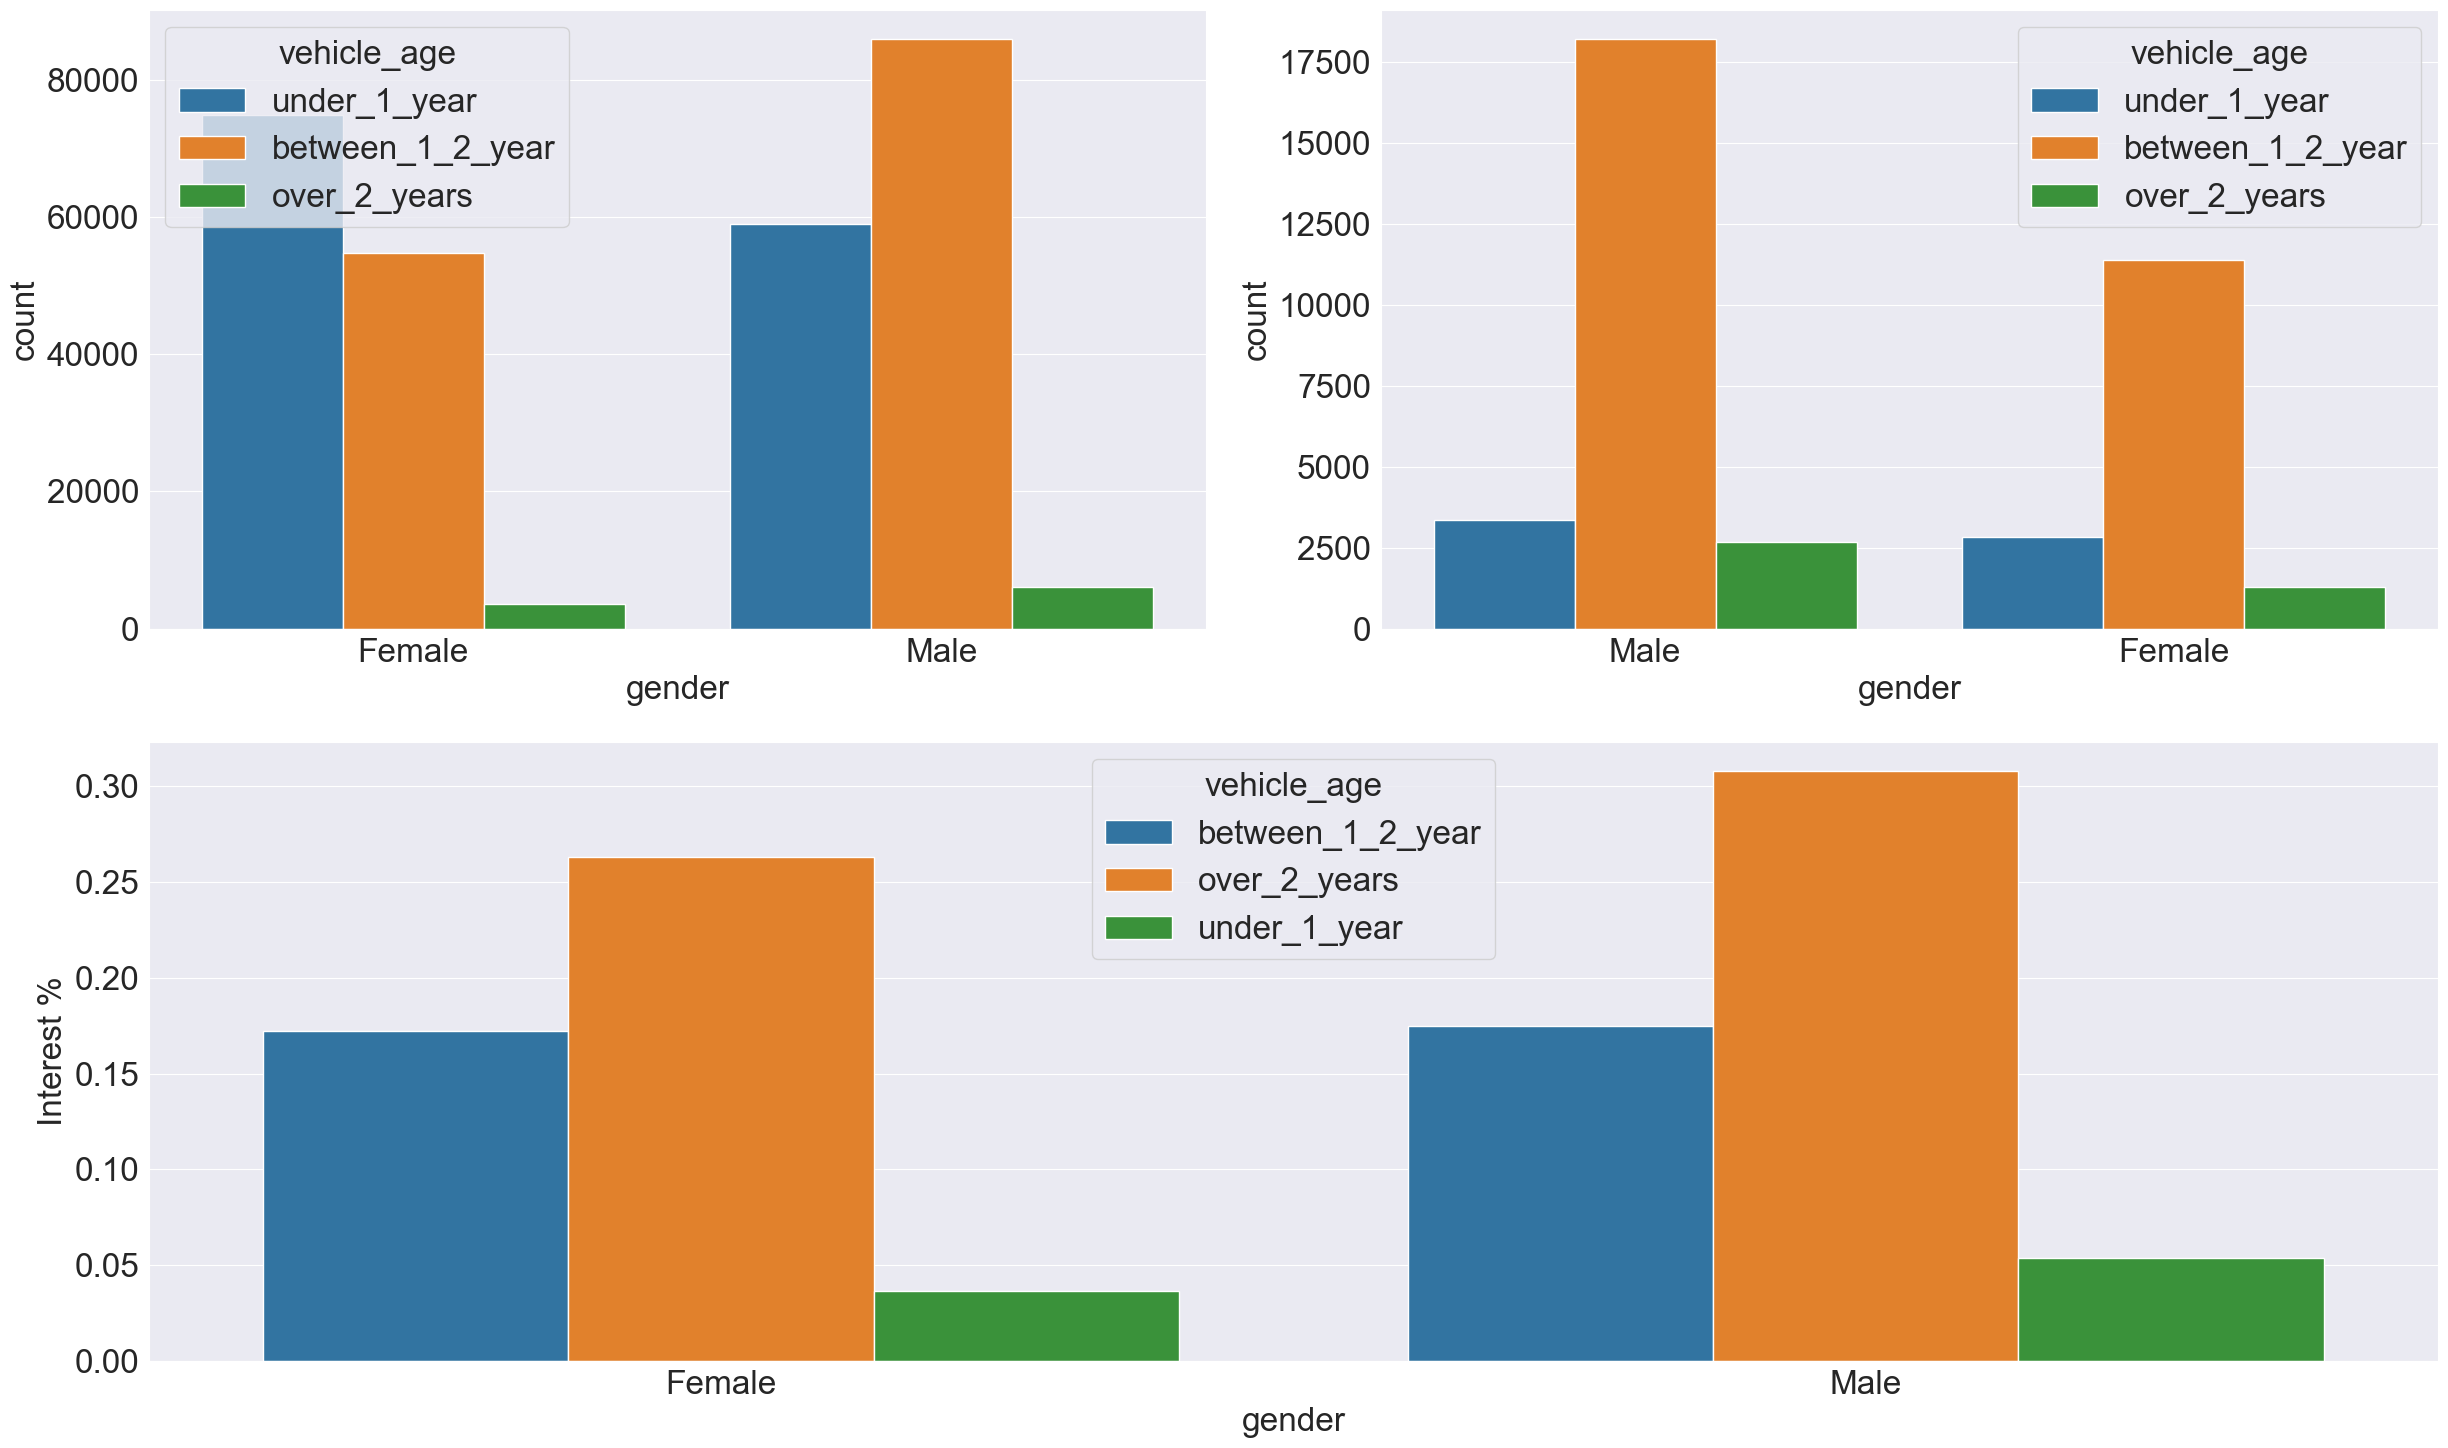

In [49]:
grid = GridSpec(2,2)
plt.figure(figsize=(25, 15))
plt.subplot(grid[0, 0])
sns.countplot(hue='vehicle_age', x='gender', data=df3.query('response == 0'), hue_order=df3['vehicle_age'].unique())

plt.subplot(grid[0, 1])
sns.countplot(hue='vehicle_age', x='gender', data=df3.query('response == 1'), hue_order=df3['vehicle_age'].unique())
plt.ylim(0, )

plt.subplot(grid[1, :])
hf.cohort_2v_cat_plot(df3, 'gender', 'vehicle_age')

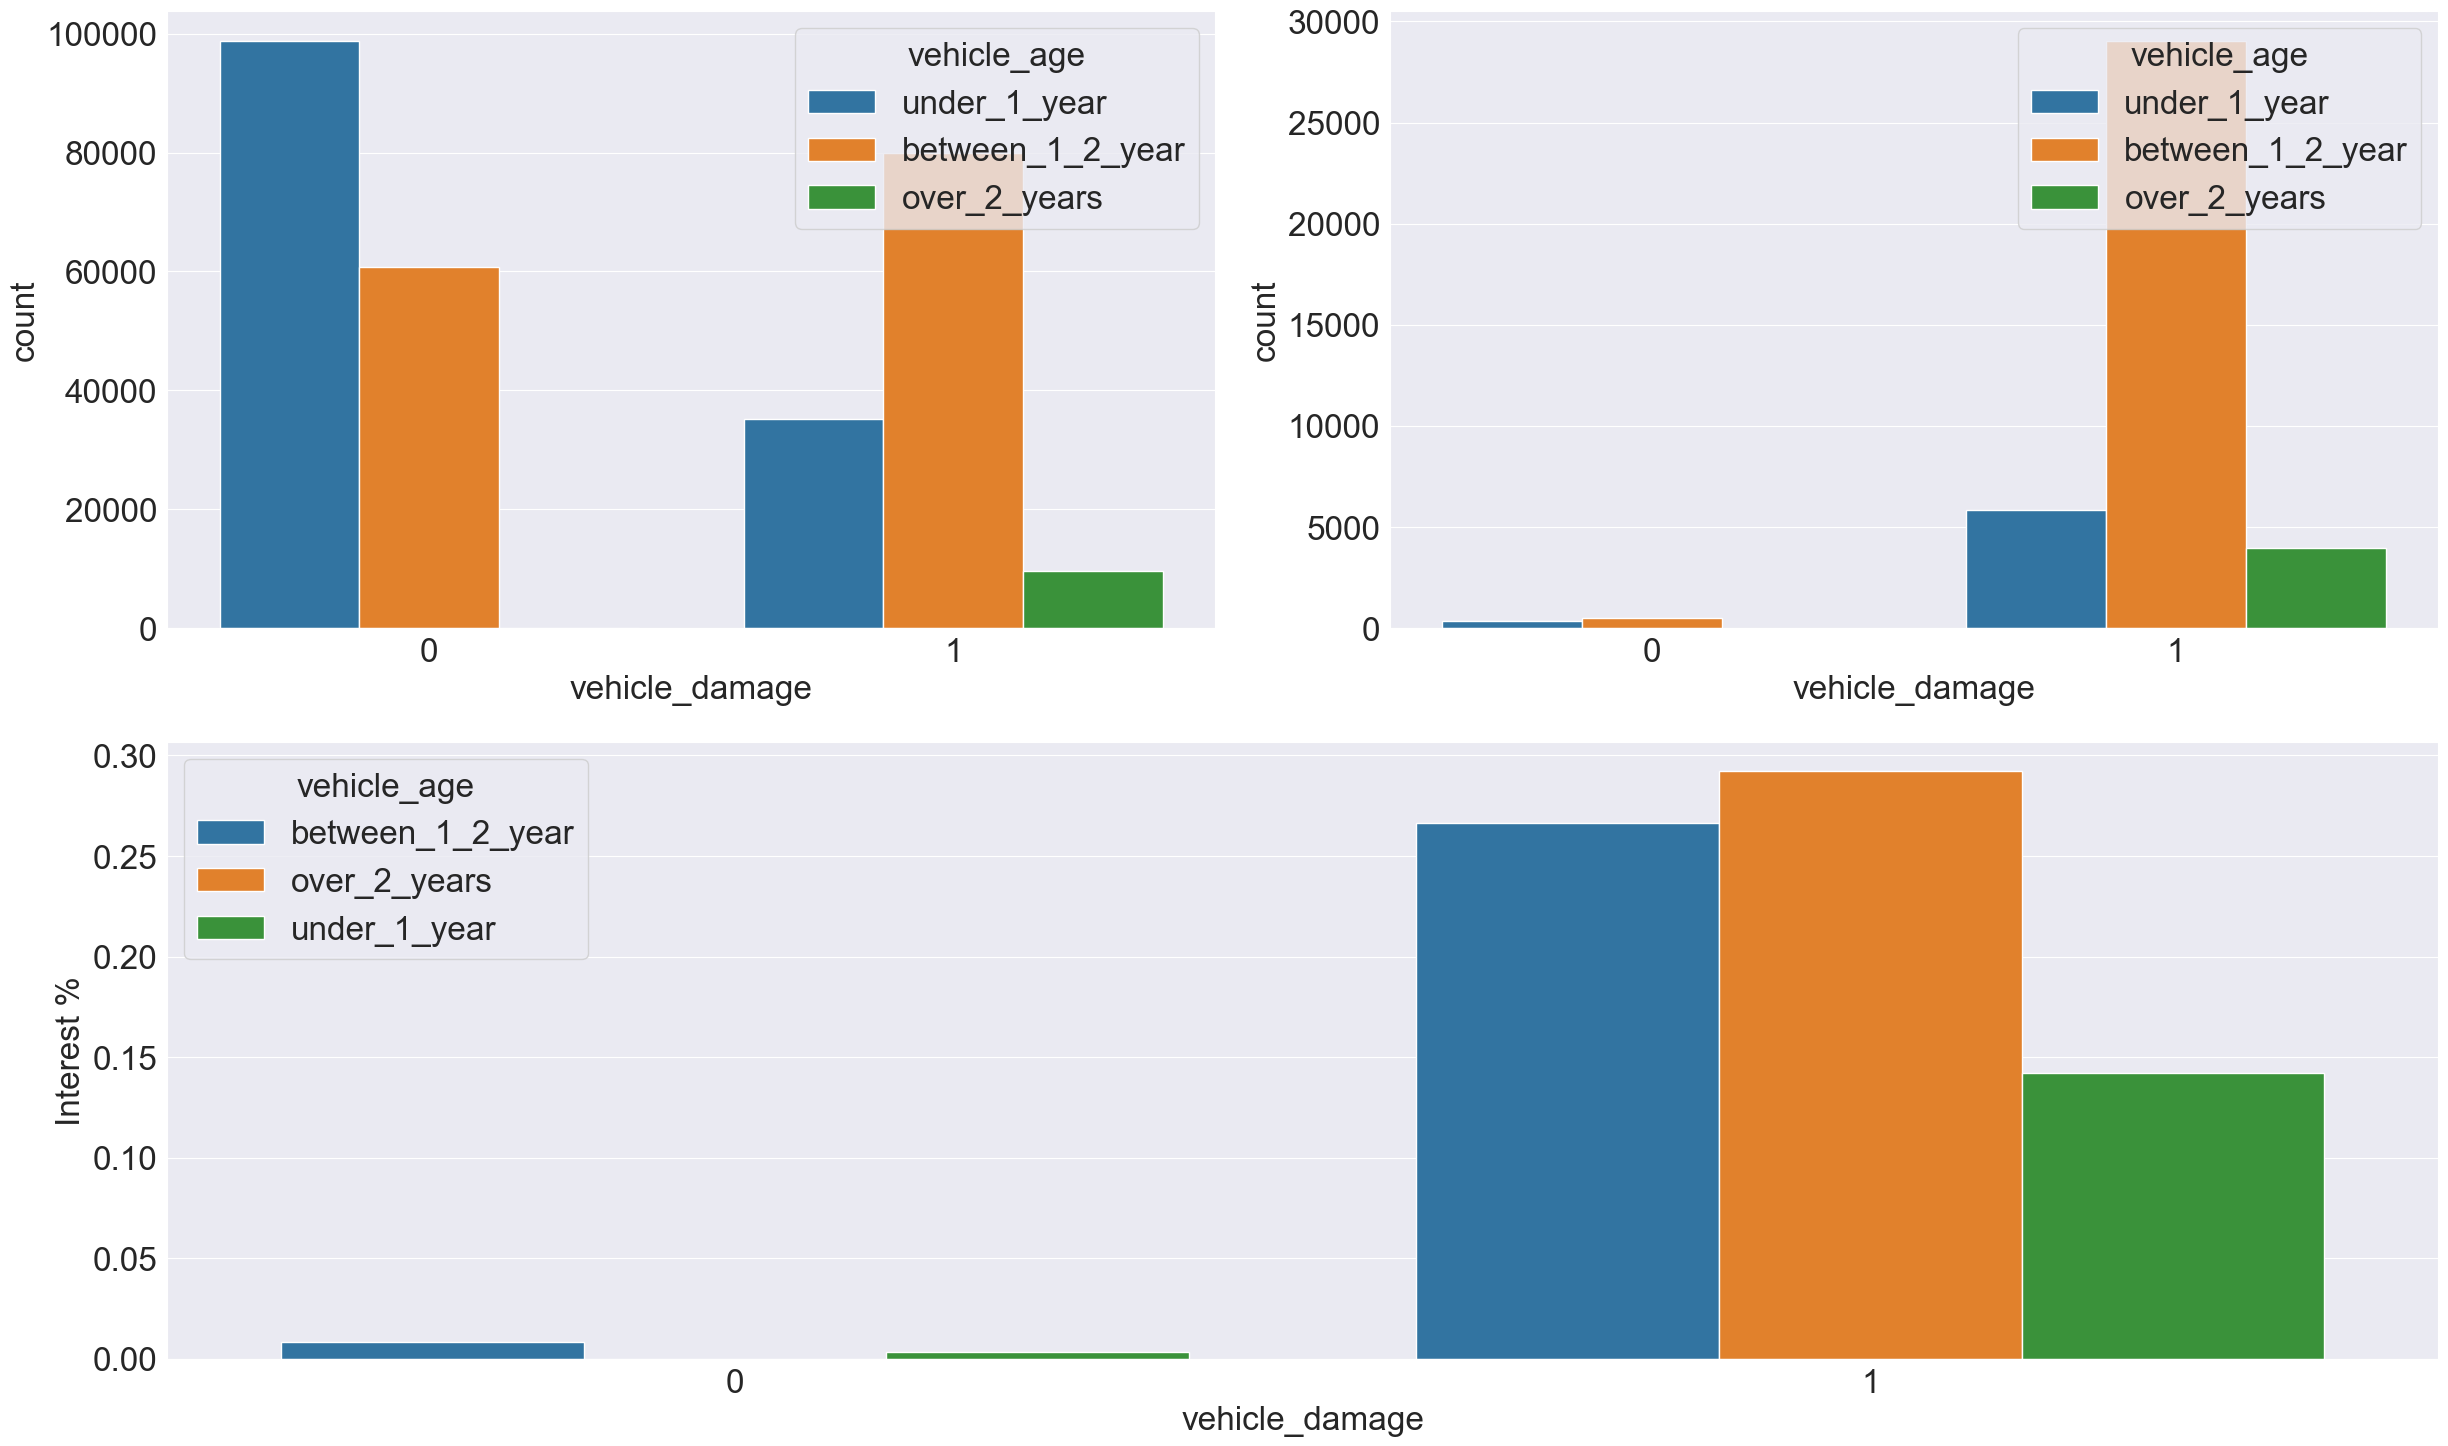

In [50]:
grid = GridSpec(2,2)
plt.figure(figsize=(25, 15))
plt.subplot(grid[0, 0])
sns.countplot(hue='vehicle_age', x='vehicle_damage', data=df3.query('response == 0'), hue_order=df3['vehicle_age'].unique())

plt.subplot(grid[0, 1])
sns.countplot(hue='vehicle_age', x='vehicle_damage', data=df3.query('response == 1'), hue_order=df3['vehicle_age'].unique())

plt.ylim(0, )

plt.subplot(grid[1, :])
hf.cohort_2v_cat_plot(df3, 'vehicle_damage', 'vehicle_age')

## Multivarate Analysis

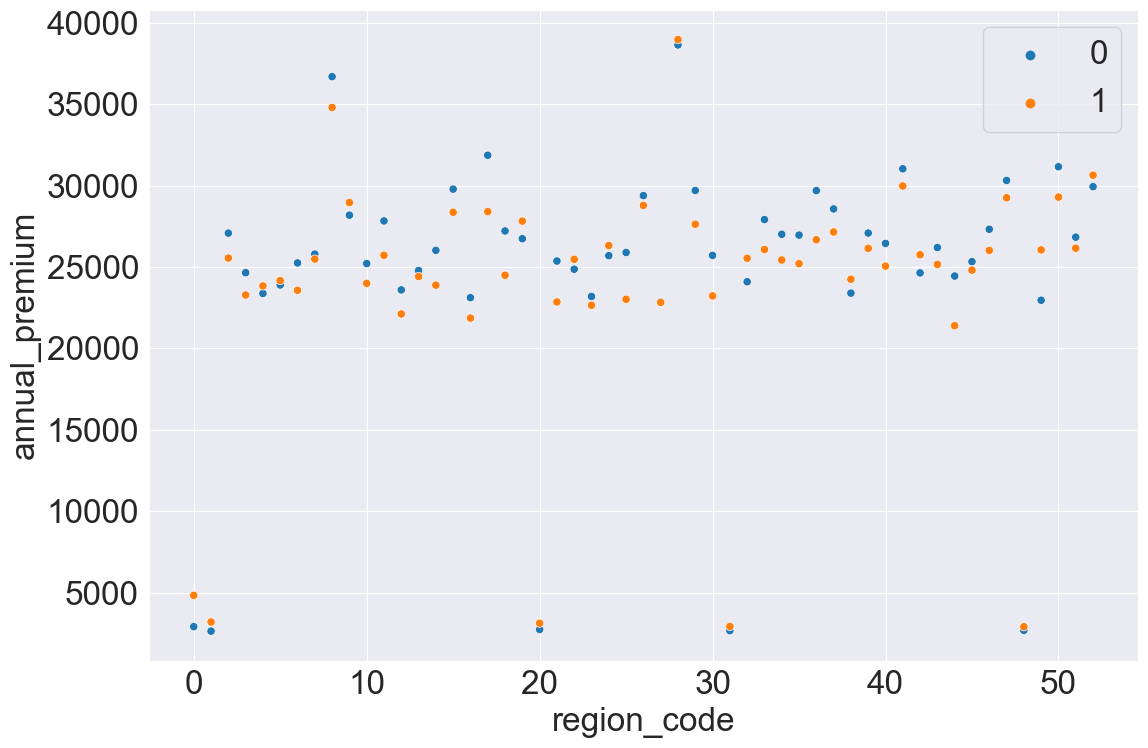

In [51]:
plt.figure(figsize=(12, 8))

aux = df3[['region_code', 'response', 'annual_premium']].groupby(['region_code', 'response']).mean()
sns.scatterplot(x='region_code', y='annual_premium', hue='response', data=aux, markers='x')
plt.legend(loc='best')

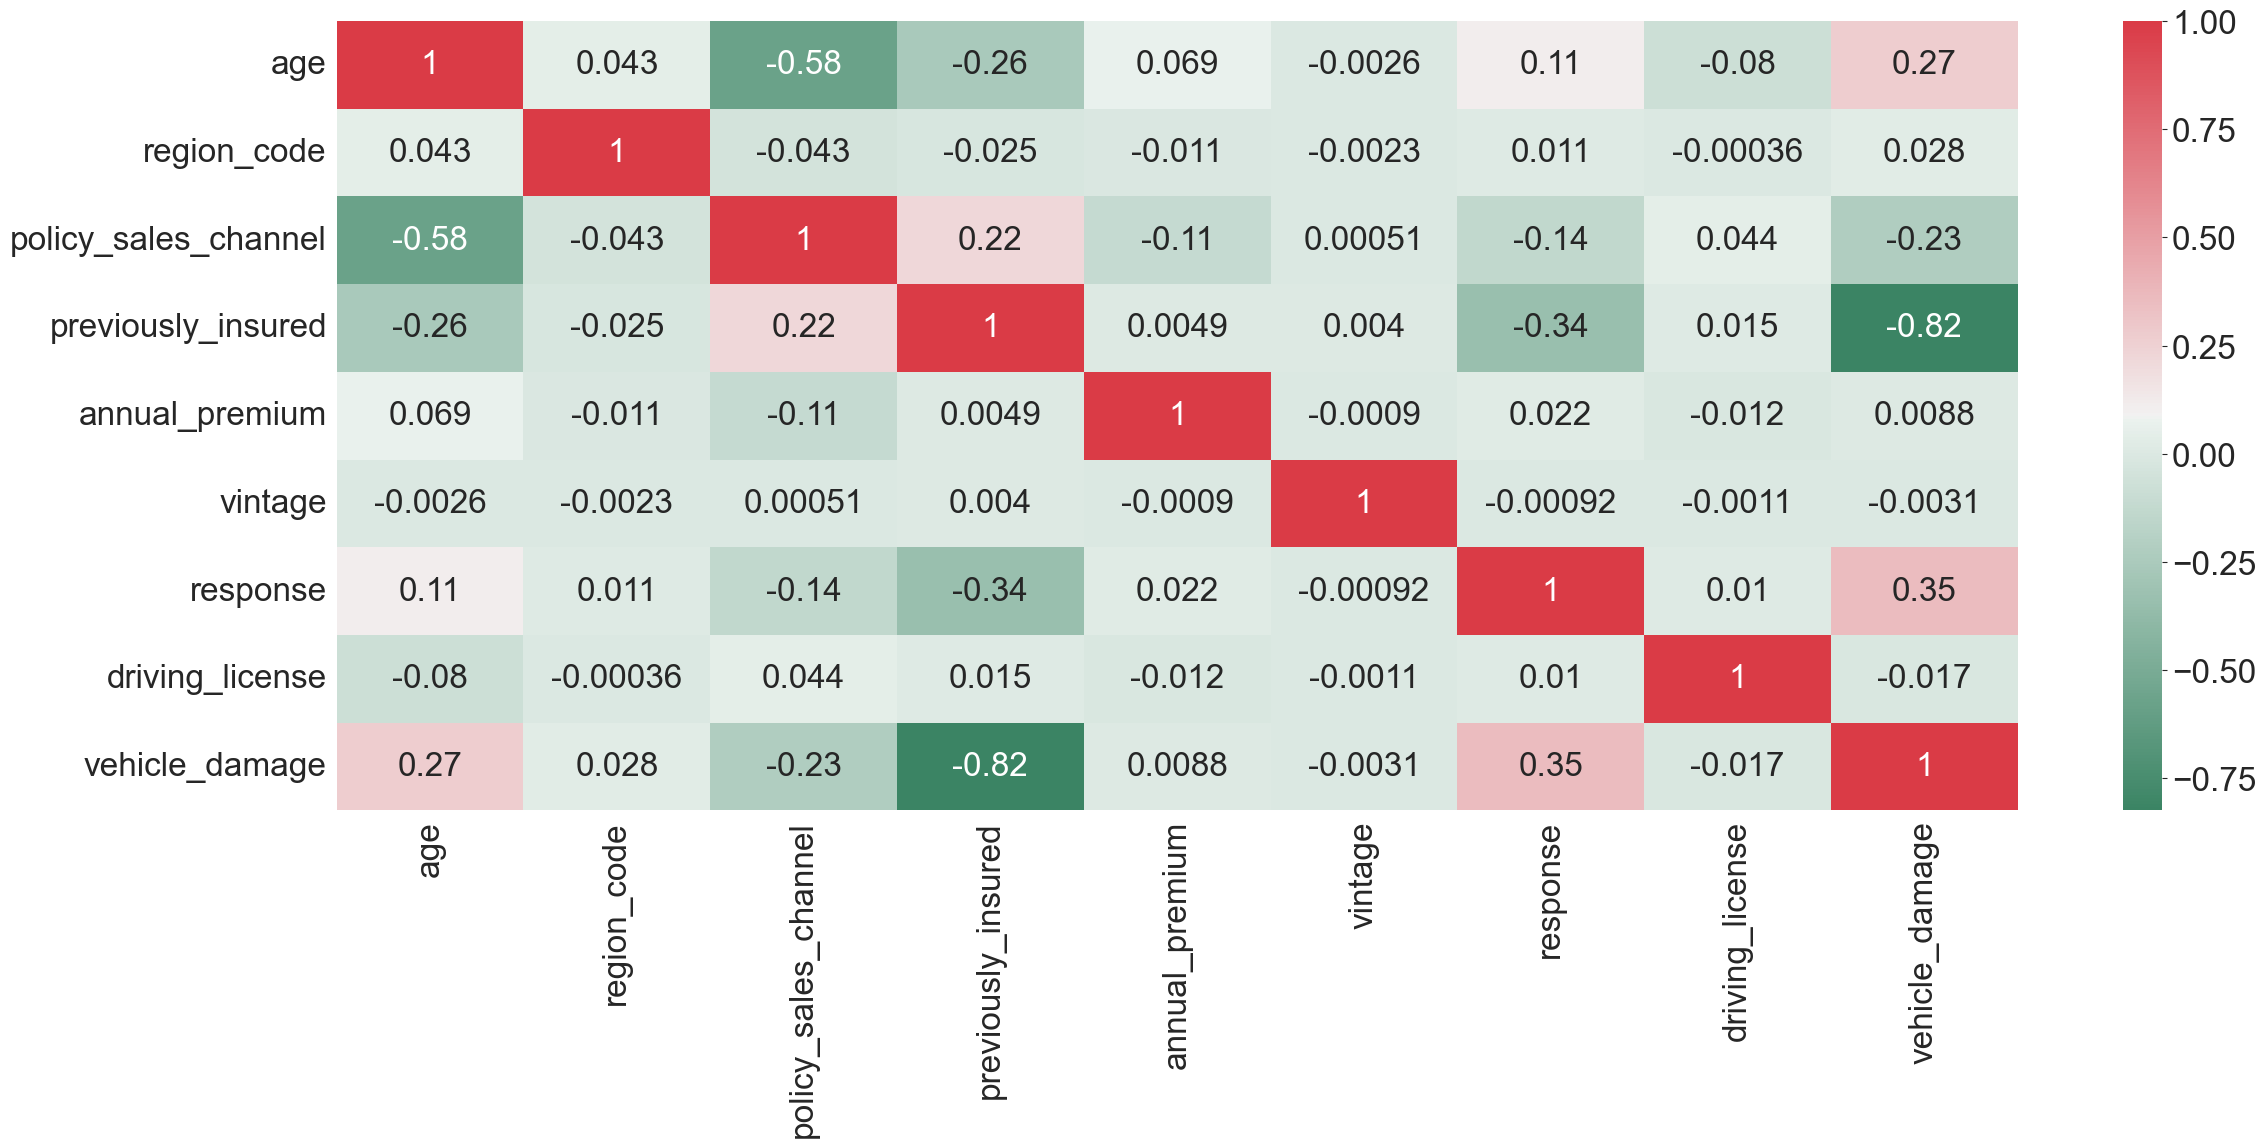

In [52]:
corr = df3.drop('id', axis=1).corr(numeric_only=True)
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap,);

**Point Biserial Correlation**

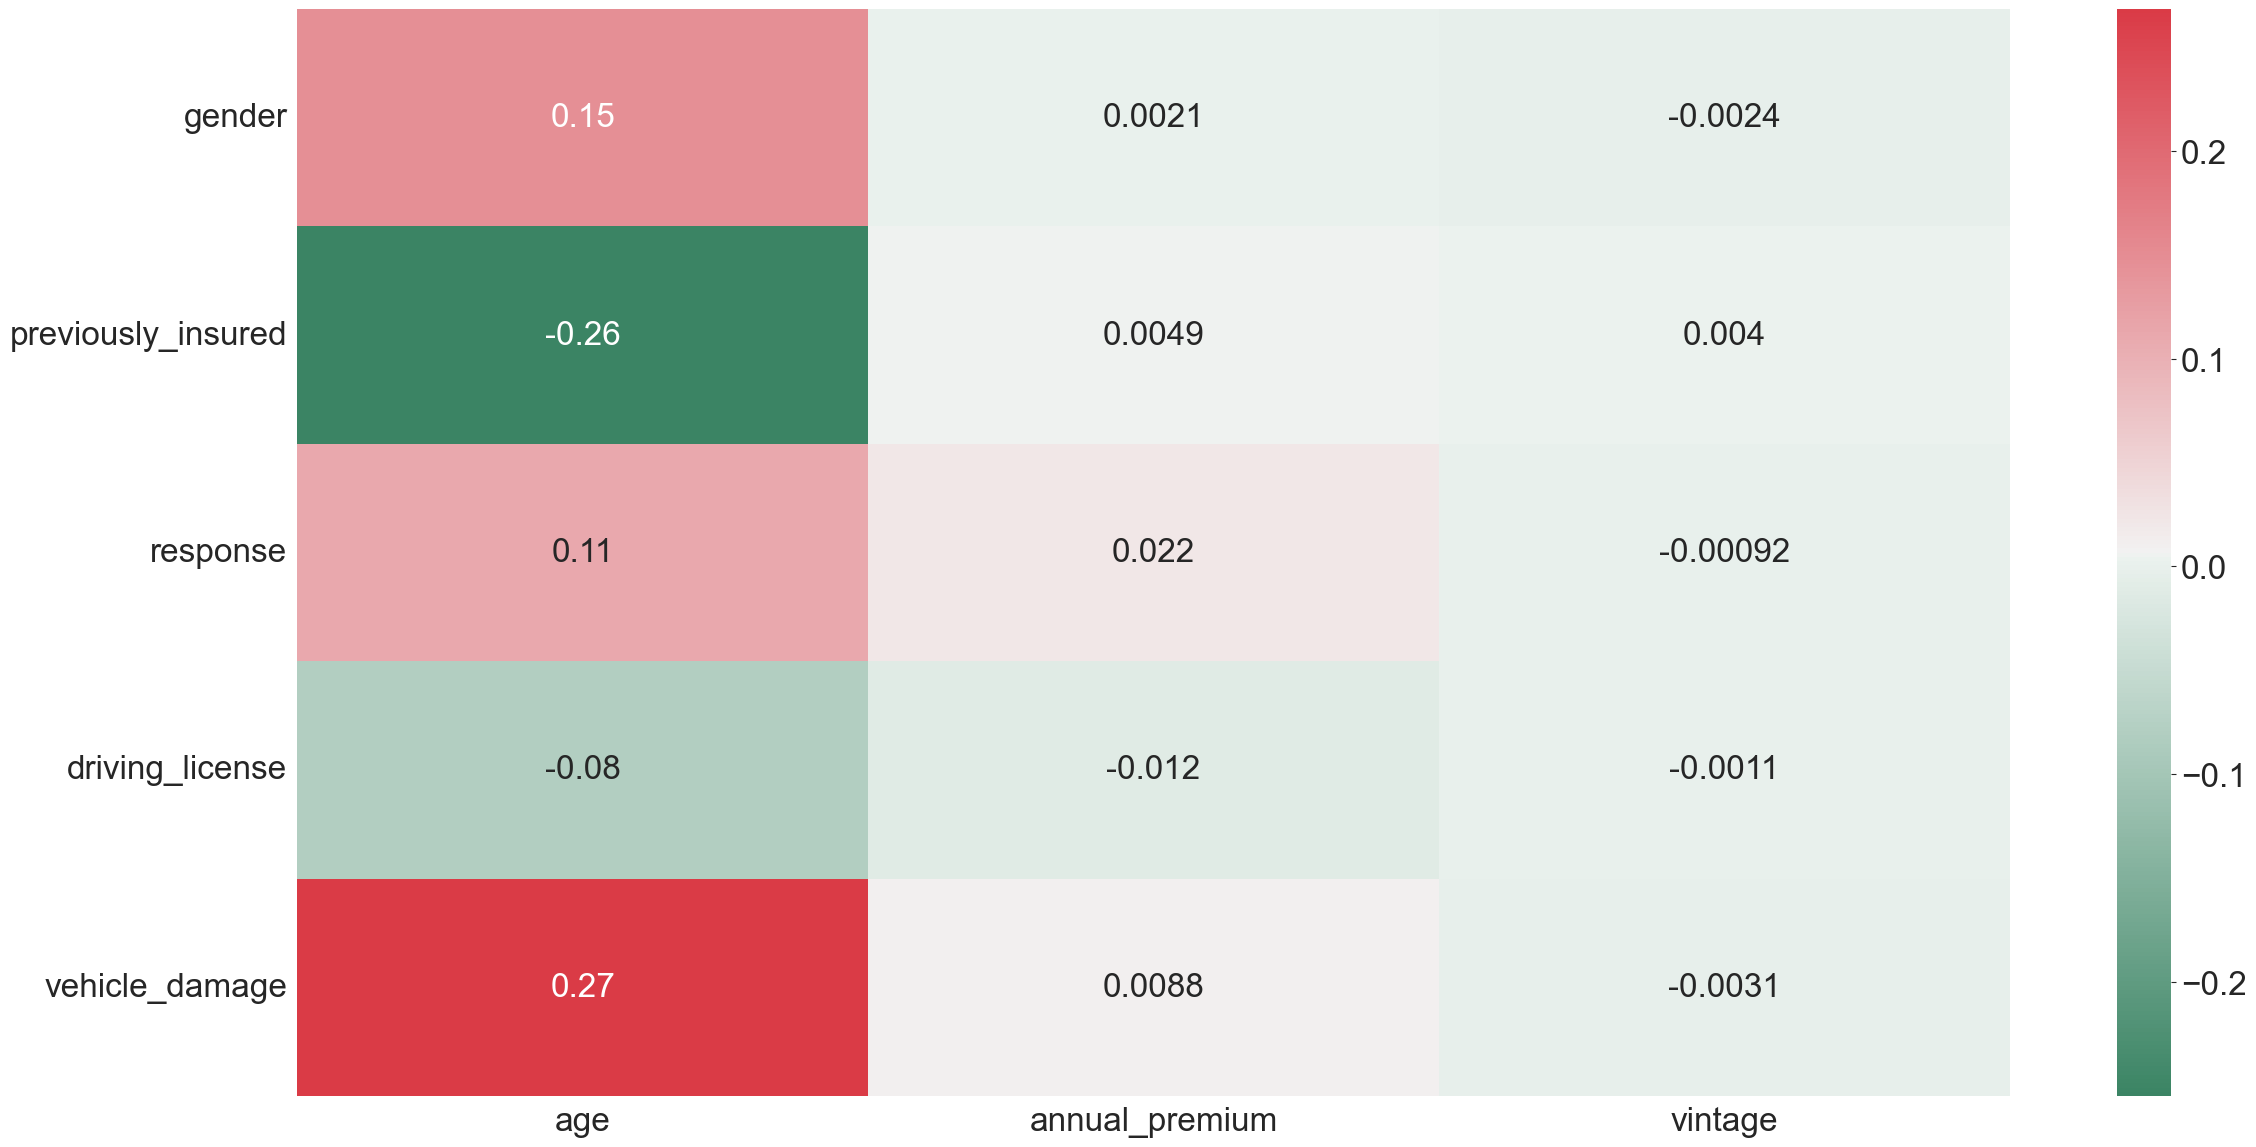

In [53]:
aux = df3.copy()
aux['gender'] = aux['gender'].apply(lambda x: 0 if x =='Female' else 1)

binary_cols = ['gender', 'previously_insured', 'response', 'driving_license', 'vehicle_damage']
continuous_cols = ['age', 'annual_premium', 'vintage']

dic = {}
lis = []

for col in binary_cols:
    for num_col in continuous_cols:
        cor = ss.pointbiserialr(aux[col], aux[num_col])[0]
        lis.append(cor)

    lis_ = lis.copy()
    dic[col] = lis_
    lis.clear()

pb_cor = pd.DataFrame(dic, index=continuous_cols).T

sns.heatmap(pb_cor, annot=True, cmap=cmap);

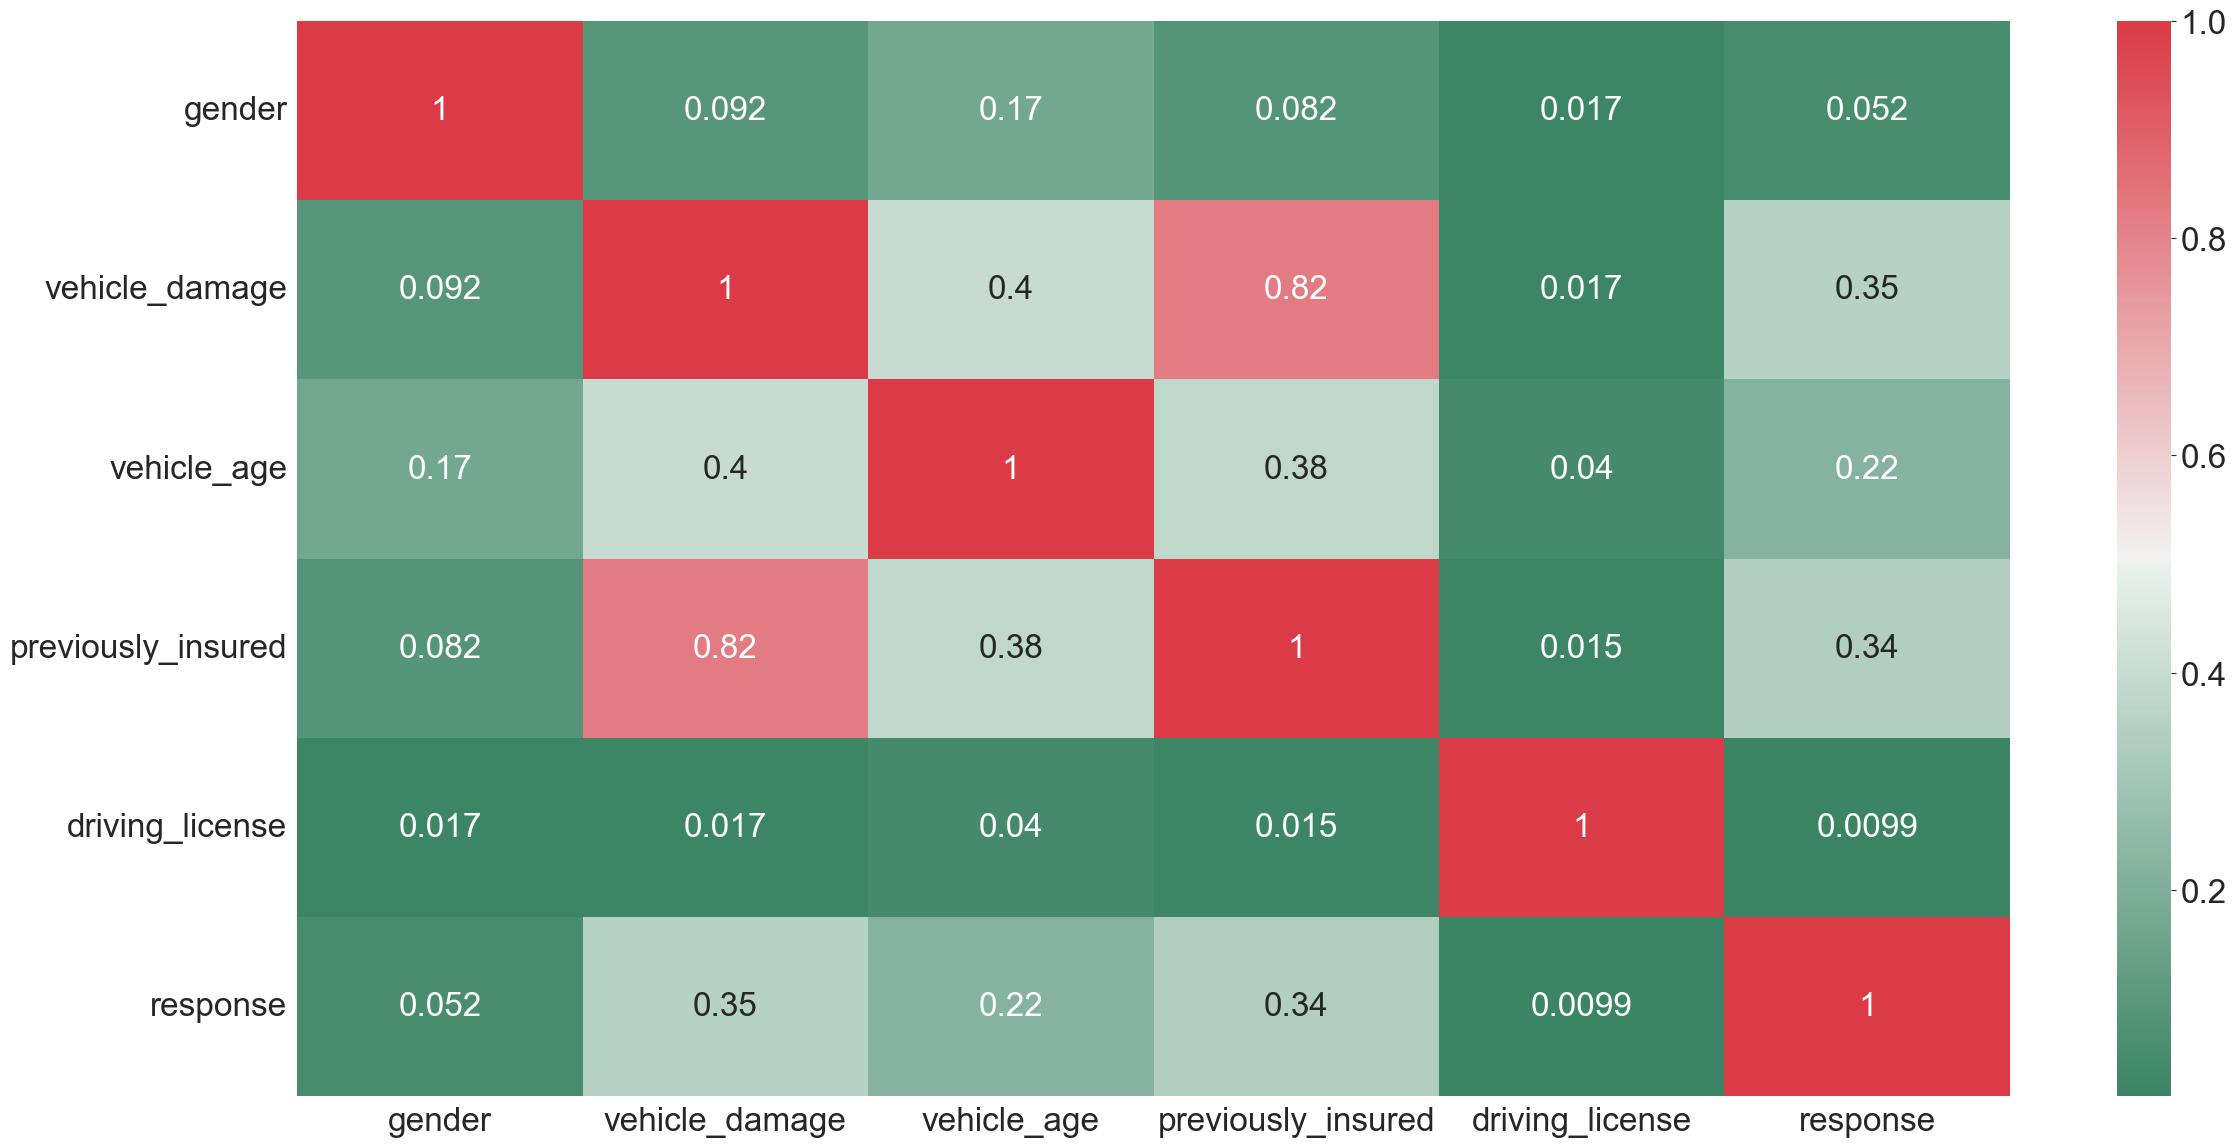

In [54]:
dic = {}
lis = []
for att in ['gender', 'vehicle_damage', 'vehicle_age', 'previously_insured', 'driving_license', 'response']:
    for att_2 in ['gender', 'vehicle_damage', 'vehicle_age', 'previously_insured', 'driving_license', 'response']:
        a = hf.cramer_v(df3[att], df3[att_2])
        lis.append(a)
    lista = lis.copy()
    dic[att] = lista
    lis.clear()
assoc = pd.DataFrame(dic)
assoc = assoc.set_index(assoc.columns)

sns.heatmap(assoc, annot=True, cmap=cmap);

# Top 5 Insights

**H1**. Men are more interested in vehicle insurance than women.

TRUE: Almost 14% of men are interested in vehicle insurance, while only a little bit above 10% of women showed interest in vehicle insurance.

**H2**. Older people are more proprense to acquire vehicle insurance.

TRUE: The median age of people that are interested in vehicle insurance is higher (around 45 years) than the median age of people that are not interested in vehicle insurance (around 34 years). 

**H3**. Customers with a new vehicle are more interested in vehicle insurance.

FALSE: The percentage of people interested in vehicle insurance is higher for those with older cars.

**H4**. Customers that had a problem with their vehicle in the past are more interested in vehicle insurance.

TRUE: The percentage of people that had some problem with their vehicle in the past and are interested in vehicle insurance is way higher than those who didn't have any problems in the past (almost zero).

**H5**. Customers with higher annual premium will be less interested in acquiring another type of insurance.

FALSE: The median annual premium is a bit higher for people that are interested in vehicle insurance, 